In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pickle
import json
import os
import numpy as np
import pandas as pd


In [3]:
disease_queries1 = {
    'alzheimers': [
        "What are the early symptoms of Alzheimer's disease?",
        "Can you explain the stages of Alzheimer's disease?",
        "How can I soothe skin irritation from a rash due to Alzheimer's?",
        "Are there any breakthroughs in Alzheimer's research?",
        "Can meditation help manage the symptoms of Alzheimer's?"
    ],
    'back pain': [
        "How is back pain treated?",
        "Is physical therapy effective for back pain?",
        "Should I undergo surgery for severe back pain?",
        "Are there any alternative therapies for back pain?",
        "What are the best exercises to strengthen the back muscles?"
    ],
    'chest pain': [
        "Are there any over-the-counter medications for chest pain?",
        "What are the differences between angina and chest pain?",
        "When should I see a doctor for persistent chest pain?",
        "How to differentiate between muscle pain and chest pain?",
        "How does smoking contribute to congestion and chest issues?"
    ],
    'common cold': [
        "What are the best home remedies for the common cold?",
        "How long does it take for a cold to run its course?",
        "Are there specific exercises to strengthen the back muscles?",
        "How to differentiate between muscle pain and chest pain?",
        "How does smoking contribute to congestion and chest issues?"
    ],
    'congestion': [
        "How can I relieve congestion in my nose and throat?",
        "What are the risk factors for developing congestion?",
        "Can allergies cause chronic congestion?",
        "How to choose the right sunscreen for sensitive skin with a rash?",
        "How does smoking contribute to congestion and chest issues?"
    ],
    'cough': [
        "Is coughing a common symptom of COVID-19?",
        "Can a persistent cough be a sign of a serious condition?",
        "How to boost my immune system to prevent colds?",
        "What are the latest breakthroughs in cold research?",
        "Are there any herbal remedies for cold relief?"
    ],
    'depression': [
        "Can depression be managed without medication?",
        "What are the side effects of antidepressant medications?",
        "What is the role of genetics in depression risk?",
        "How can I manage anxiety-related gastrointestinal symptoms?",
        "Can meditation help manage the symptoms of depression?"
    ],
    'diabetes': [
        "What are the dietary restrictions for someone with diabetes?",
        "How can I prevent skin infections in the presence of a rash due to diabetes?",
        "What is the connection between nutrition and diabetes management?",
        "How does alcohol consumption affect diabetes?",
        "How to prepare a healthy diet plan for diabetes?"
    ],
    'diarrhea': [
        "How can I prevent diarrhea when traveling?",
        "How can I treat chronic diarrhea?",
        "Can certain foods trigger diarrhea in sensitive individuals?",
        "How to maintain hydration during episodes of diarrhea?",
        "Are there any dietary triggers for diarrhea?"
    ],
    'fever': [
        "What is the normal body temperature during a fever?",
        "How high is too high of a fever in adults?",
        "How does fever play a role in fighting infections?",
        "Is a fever always a sign of illness?",
        "How to stay hydrated when experiencing a fever?"
    ],
    'gastrointestinal': [
        "What are the causes of gastrointestinal problems?",
        "What is the connection between stress and gastrointestinal issues?",
        "How can I improve my gut health to alleviate digestive problems?",
        "How does stress affect the gastrointestinal system?",
        "What are the dietary recommendations for gastrointestinal health?"
    ],
    'headache': [
        "What are the best home remedies for relieving headaches?",
        "What should I do if I experience sudden and severe headaches?",
        "How can I differentiate between a tension headache and a migraine?",
        "Can you suggest relaxation techniques for headache relief?",
        "What are the latest research findings on headache management?",
        "What are the common triggers for headaches?",
        "How to differentiate between various types of headaches?",
        "Are there any natural remedies for headache relief?",
        "What are the long-term effects of chronic headaches?",
        "How to manage daily life with recurring headaches?"
    ],
    'heart attack': [
        "What are the warning signs of a heart attack?",
        "What is the difference between a panic attack and a heart attack?",
        "How long does it take to recover from a heart attack?",
        "What are the signs of a heart attack in men and women?",
        "What are the risk factors for heart attacks in young adults?"
    ],
    'rash': [
        "How can I treat a rash on my skin?",
        "What are the best remedies for itching due to a rash?",
        "Can you recommend a diabetic-friendly sunscreen for a rash?",
        "Are there any natural remedies for preventing skin rashes?",
        "How to recognize the signs of a serious rash?"
    ],
    'urinary tract infection': [
        "What are the common antibiotics for urinary tract infections?",
        "Can cranberry supplements help prevent UTIs?",
        "How can I prevent urinary tract infections in the future?",
        "What are the benefits of drinking cranberry juice for UTI prevention?",
        "Are there any alternative therapies for UTI treatment?"
    ],
    'weakness': [
        "How can I regain strength after weakness due to illness?",
        "What are the psychological effects of living with weakness?",
        "Can physical therapy help with weakness recovery?",
        "What are the latest breakthroughs in weakness management?",
        "How to maintain a healthy lifestyle despite weakness?"
    ]
}


In [5]:
disease_queries2 = {
    'alzheimers': {
        'symptoms': [
            "What are the most common early symptoms of Alzheimer's disease?",
            "How can I differentiate between normal forgetfulness and Alzheimer's symptoms?",
            "What are the signs of agitation in Alzheimer's patients?",
            "Are there any effective treatments for memory loss in Alzheimer's?",
            "How does Alzheimer's affect a person's ability to speak?"
        ],
        'medicines': [
            "Can medications like Donepezil help improve cognitive function in Alzheimer's patients?",
            "What are the potential side effects of Memantine?",
            "How do drugs like Aducanumab work in Alzheimer's treatment?",
            "Are there any medications specifically designed to address mood swings in Alzheimer's patients?",
            "What are the benefits and risks of using antipsychotic medications in Alzheimer's treatment?"
        ]
    },
    'back pain': {
        'symptoms': [
            "Which symptoms indicate a more serious underlying cause of back pain?",
            "How can I differentiate between muscle spasms and radiating pain in my back?",
            "What are the signs of weakness in the legs associated with back pain?",
            "When should I consider prescription pain relievers for back pain?",
            "What are the potential side effects of corticosteroids for back pain?"
        ],
        'medicines': [
            "How do muscle relaxants work in the treatment of back pain?",
            "Are there any over-the-counter pain relievers that are effective for back pain?",
            "What role can physical therapy play in managing chronic back pain?",
            "Can TENS therapy be a useful option for relieving back pain?",
            "Are spinal injections a long-term solution for chronic back pain?"
        ]
    },
    'chest pain': {
        'symptoms': [
            "How can I differentiate between chest pain due to heart problems and other causes?",
            "What should I do if I experience chest pain along with nausea and sweating?",
            "Are there any home remedies to alleviate heartburn-related chest pain?",
            "How do medications like nitroglycerin work to relieve chest pain?",
            "What are the potential side effects of beta-blockers for chest pain?"
        ],
        'medicines': [
            "What are thrombolytics, and how are they used in the treatment of chest pain?",
            "How do ACE inhibitors help manage chest pain?",
            "Are there any anti-anxiety medications used in chest pain treatment?",
            "What role can statins play in preventing chest pain related to heart disease?",
            "What are the common anticoagulants prescribed for chest pain management?"
        ]
    },
    'common cold': {
        'symptoms': [
            "What are the best practices for preventing the common cold?",
            "How long should I rest when I have a cold?",
            "Can allergies make the common cold symptoms worse?",
            "What are the common complications of a severe cold?",
            "How can I prevent the spread of the cold virus to others?"
        ],
        'medicines': [
            "Are there any antiviral medications effective against the common cold?",
            "What are the potential side effects of decongestants?",
            "Can zinc supplements help shorten the duration of a cold?",
            "How do antihistamines work in relieving cold symptoms?",
            "Are there any recommended vitamin supplements for cold prevention?"
        ]
    },
    'congestion': {
        'symptoms': [
            "What are the common causes of nasal congestion?",
            "How can I relieve sinus pressure associated with congestion?",
            "Is loss of smell or taste a common symptom of congestion?",
            "What are the potential complications of chronic congestion?",
            "When should I seek medical attention for severe congestion?"
        ],
        'medicines': [
            "How do nasal corticosteroids work in relieving congestion?",
            "What are the potential side effects of mucolytics for congestion?",
            "Can saline nasal sprays be used long-term for congestion relief?",
            "What are the benefits of steam inhalation for congestion?",
            "When are antibiotics prescribed for congestion treatment?"
        ]
    },
    'cough': {
        'symptoms': [
            "What are the common causes of persistent coughing?",
            "How can I manage a persistent cough with sore throat symptoms?",
            "What are the potential complications of a severe cough?",
            "Is fever a common symptom associated with a cough?",
            "What are the signs of wheezing in a coughing episode?"
        ],
        'medicines': [
            "How do expectorants help in managing a cough with mucus?",
            "Are there any over-the-counter bronchodilators for cough relief?",
            "What are the potential side effects of corticosteroids for cough treatment?",
            "When are antibiotics prescribed for cough-related infections?",
            "What are the benefits of using throat lozenges for cough comfort?"
        ]
    },
    'depression': {
        'symptoms': [
            "How can I recognize the signs of depression in myself or others?",
            "What are the physical symptoms associated with depression?",
            "Is irritability a common symptom of depression?",
            "Can depression cause physical health problems?",
            "What is the link between sleep disturbances and depression?"
        ],
        'medicines': [
            "What are the different classes of antidepressant medications?",
            "How do selective serotonin reuptake inhibitors (SSRIs) work?",
            "What are the potential side effects of tricyclic antidepressants (TCAs)?",
            "Are benzodiazepines used in the treatment of depression?",
            "How does electroconvulsive therapy (ECT) work in severe depression cases?"
        ]
    },
    'diabetes': {
        'symptoms': [
            "How can I recognize the early warning signs of diabetes?",
            "What are the potential complications of uncontrolled diabetes?",
            "Is weight loss a common symptom of diabetes?",
            "Can diabetes lead to vision problems?",
            "What role does diet play in managing diabetes?"
        ],
        'medicines': [
            "How do oral antidiabetic drugs like metformin help manage diabetes?",
            "Are there any injectable medications for diabetes treatment?",
            "What are SGLT2 inhibitors and how do they work?",
            "How do GLP-1 receptor agonists help control blood sugar in diabetes?",
            "What are the potential side effects of sulfonylureas for diabetes?"
        ]
    },
    'diarrhea': {
        'symptoms': [
            "When should I be concerned about diarrhea and seek medical help?",
            "What are the signs of dehydration due to diarrhea?",
            "Is blood in stool a serious symptom of diarrhea?",
            "Can diarrhea lead to weight loss?",
            "How long does acute diarrhea usually last?"
        ],
        'medicines': [
            "What are the most common over-the-counter treatments for diarrhea?",
            "When are antibiotics prescribed for diarrhea treatment?",
            "How do anti-diarrheal prescription medications work?",
            "What are the benefits of using rehydration solutions for diarrhea?",
            "Are there dietary modifications that can help alleviate diarrhea?"
        ]
    },
    'fever': {
        'symptoms': [
            "What is considered a high fever in adults?",
            "What are the potential complications of a prolonged fever?",
            "How can I differentiate between a fever due to infection and other causes?",
            "Is fever a common symptom of viral infections?",
            "When should I seek medical attention for a fever?"
        ],
        'medicines': [
            "What are the common over-the-counter fever-reducing medications?",
            "How do antipyretic medications like acetaminophen work?",
            "When are antibiotics prescribed for a fever caused by a bacterial infection?",
            "Are there any prescription fever-reducing medications?",
            "What are the benefits of using fever-reducing baths?"
        ]
    },
    'gastrointestinal': {
        'symptoms': [
            "What are the common causes of abdominal pain and bloating?",
            "When should I be concerned about blood in stool or vomit?",
            "How can I manage heartburn and indigestion?",
            "Is nausea a common symptom of gastrointestinal problems?",
            "What dietary changes can alleviate gas and bloating?"
        ],
        'medicines': [
            "How do antacids work to relieve heartburn and indigestion?",
            "What are H2 blockers and how are they used in gastrointestinal treatment?",
            "Can proton pump inhibitors (PPIs) help manage acid reflux?",
            "What are the common anti-nausea medications?",
            "When are antibiotics prescribed for gastrointestinal issues?"
        ]
    },
    'headache': {
        'symptoms': [
            "What are the common triggers for tension headaches?",
            "How can I differentiate between a tension headache and a migraine?",
            "Are there specific lifestyle factors that worsen headaches?",
            "Can visual disturbances be a sign of a severe headache?",
            "How do tension headaches affect neck and shoulder muscles?"
        ],
        'medicines': [
            "What are the most commonly used over-the-counter pain relievers for headaches?",
            "How do triptans work in the treatment of migraines?",
            "Are there any non-pharmacological approaches to managing chronic headaches?",
            "Can caffeine-containing medications help with headache relief?",
            "What are the potential side effects of ergotamines for headache treatment?"
        ]
    },
    'heart attack': {
        'symptoms': [
            "What are the warning signs of a heart attack in men and women?",
            "How does anxiety relate to chest pain and heart attacks?",
            "How long does it typically take to recover from a heart attack?",
            "What are the common long-term effects of a heart attack?",
            "What lifestyle changes can reduce the risk of a second heart attack?"
        ],
        'medicines': [
            "How does nitroglycerin work to relieve chest pain during a heart attack?",
            "What is the role of aspirin in the early treatment of a heart attack?",
            "Can beta-blockers help manage heart attack symptoms?",
            "What are thrombolytics and how are they used in heart attack treatment?",
            "Are there anti-anxiety medications used in heart attack recovery?"
        ]
    },
    'rash': {
        'symptoms': [
            "How can I differentiate between a mild rash and a serious skin condition?",
            "What are the common causes of itching associated with skin rashes?",
            "Is fluid-filled blistering a sign of a contagious rash?",
            "What are the potential complications of scratching a rash?",
            "Can a rash be a symptom of an underlying systemic condition?"
        ],
        'medicines': [
            "What are the most commonly used topical treatments for skin rashes?",
            "How do antihistamines help relieve itching associated with rashes?",
            "Are there any antifungal creams used for rash treatment?",
            "What are the benefits of using topical corticosteroids for rash inflammation?",
            "When are antibiotics or antiviral medications prescribed for rashes?"
        ]
    },
    'urinary tract infection': {
        'symptoms': [
            "What are the risk factors for developing urinary tract infections?",
            "How can I prevent recurrent urinary tract infections?",
            "Is back pain a common symptom of urinary tract infections?",
            "When should I seek medical attention for a urinary tract infection?",
            "What are the potential complications of untreated UTIs?"
        ],
        'medicines': [
            "What are the common antibiotics prescribed for urinary tract infections?",
            "How do urinary tract analgesics like phenazopyridine work?",
            "Can cranberry supplements help prevent UTIs?",
            "What are the potential side effects of antibiotics used for UTI treatment?",
            "Are there any prescription medications for recurring UTIs?"
        ]
    },
    'weakness': {
        'symptoms': [
            "How can I determine the underlying cause of muscle weakness?",
            "What role does fatigue play in the experience of weakness?",
            "Can muscle pain or aches accompany muscle weakness?",
            "Is weakness in specific muscle groups a significant symptom?",
            "How does weakness affect daily activities and mobility?"
        ],
        'medicines': [
            "What are the treatment options for weakness depending on the underlying cause?",
            "How does physical therapy help in the management of muscle weakness?",
            "Are there specific medications for managing weakness due to certain conditions?",
            "What supplements can be beneficial for addressing weakness due to deficiencies?",
            "How can counseling or therapy be helpful for psychological causes of weakness?"
        ]
    }
}


In [4]:
disease_queries3 = {
    'alzheimers': {
        'symptoms': [
            "How does memory loss progress in Alzheimer's disease?",
            "Are there early signs of Alzheimer's that I should be aware of?",
            "What behavioral changes are common in Alzheimer's patients?",
            "How does Alzheimer's affect language skills?",
            "Can personality changes be a symptom of Alzheimer's?"
        ],
        'medicines': [
            "What are the common medications prescribed for Alzheimer's treatment?",
            "How do cholinesterase inhibitors work in Alzheimer's management?",
            "Are there any experimental drugs or treatments for Alzheimer's?",
            "Can lifestyle modifications help slow down Alzheimer's progression?",
            "What role does counseling or therapy play in Alzheimer's care?"
        ]
    },
    'back pain': {
        'symptoms': [
            "How can I differentiate between acute and chronic back pain?",
            "What are the warning signs of a more serious back problem?",
            "Are there specific symptoms that indicate a herniated disc?",
            "How does sciatica pain differ from other types of back pain?",
            "What are the potential complications of untreated back pain?"
        ],
        'medicines': [
            "What over-the-counter pain relievers are recommended for back pain?",
            "How do muscle relaxants help in managing back pain?",
            "Are prescription pain relievers necessary for severe back pain?",
            "What is the role of physical therapy in back pain treatment?",
            "Can alternative therapies like acupuncture provide relief from back pain?"
        ]
    },
    'chest pain': {
        'symptoms': [
            "What are the common causes of non-cardiac chest pain?",
            "How can I tell if chest pain is related to heart problems or other issues?",
            "What are the symptoms of angina, and how is it diagnosed?",
            "Is chest pain during breathing a sign of a specific condition?",
            "What lifestyle changes can help prevent recurrent chest pain?"
        ],
        'medicines': [
            "What medications are used to relieve chest pain during angina attacks?",
            "How do nitroglycerin and beta-blockers work in chest pain management?",
            "Can antacids help with chest pain caused by acid reflux?",
            "Are there any prescription medications for chronic chest pain?",
            "What are the potential side effects of long-term chest pain medications?"
        ]
    },
    'common cold': {
        'symptoms': [
            "How long does the common cold typically last?",
            "Can the common cold lead to more severe respiratory infections?",
            "What are the differences between a cold and the flu?",
            "Are there specific symptoms that indicate a bacterial infection alongside a cold?",
            "What is the recommended rest and hydration for a cold?"
        ],
        'medicines': [
            "What over-the-counter medications can help relieve common cold symptoms?",
            "How do decongestants work to alleviate nasal congestion?",
            "Are there any antiviral medications available for the common cold?",
            "What are the potential risks of using antibiotics for a cold?",
            "Can herbal remedies and supplements help with cold relief?"
        ]
    },
    'congestion': {
        'symptoms': [
            "What are the common causes of nasal congestion?",
            "How can I relieve sinus pressure associated with congestion?",
            "When should I be concerned about loss of smell or taste?",
            "What are the potential complications of chronic congestion?",
            "Can allergies worsen nasal congestion?"
        ],
        'medicines': [
            "How do decongestants work to alleviate nasal congestion?",
            "Are nasal corticosteroids effective in managing congestion?",
            "What are the common antihistamines used for congestion relief?",
            "How does saline nasal spray help with congestion?",
            "When are antibiotics prescribed for congestion?"
        ]
    },
    'cough': {
        'symptoms': [
            "What are the common causes of a persistent cough?",
            "How can I differentiate between a productive and non-productive cough?",
            "Is coughing up mucus always a sign of infection?",
            "What are the potential complications of untreated cough?",
            "Can coughing be a symptom of underlying lung conditions?"
        ],
        'medicines': [
            "What are the common cough suppressants used for cough relief?",
            "How do expectorants work to clear mucus during a cough?",
            "Are antihistamines effective in managing cough symptoms?",
            "What are bronchodilators, and when are they prescribed for cough?",
            "When are antibiotics prescribed for cough due to bacterial infection?"
        ]
    },
    'depression': {
        'symptoms': [
            "What are the physical symptoms associated with depression?",
            "How does depression affect sleep patterns?",
            "Can depression lead to physical pain or discomfort?",
            "Is irritability a common symptom of depression?",
            "How can I differentiate between sadness and clinical depression?"
        ],
        'medicines': [
            "What are the common classes of antidepressant medications?",
            "How do SSRIs work in the treatment of depression?",
            "Are there any potential side effects of antidepressants?",
            "What is the role of therapy in depression management?",
            "Can lifestyle changes and exercise help alleviate depression symptoms?"
        ]
    },
    'diabetes': {
        'symptoms': [
            "What are the long-term complications of uncontrolled diabetes?",
            "How does diabetes affect wound healing?",
            "What are the potential eye-related complications of diabetes?",
            "Is frequent urination a common symptom of diabetes?",
            "What is diabetic neuropathy, and how does it manifest?"
        ],
        'medicines': [
            "What are the common types of insulin used in diabetes treatment?",
            "How do oral antidiabetic drugs like metformin work?",
            "Are there newer diabetes medications with different mechanisms of action?",
            "What is the role of lifestyle modifications in diabetes management?",
            "When is insulin therapy typically initiated in diabetes?"
        ]
    },
    'diarrhea': {
        'symptoms': [
            "What are the potential causes of chronic diarrhea?",
            "How can I prevent dehydration during a bout of diarrhea?",
            "What dietary changes can help alleviate diarrhea?",
            "Is blood or mucus in stool always a sign of a serious condition?",
            "When should I seek medical attention for severe diarrhea?"
        ],
        'medicines': [
            "What are the common anti-diarrheal medications used for diarrhea relief?",
            "How does loperamide (Imodium) work in managing diarrhea?",
            "Are antibiotics prescribed for certain types of diarrhea?",
            "What is the BRAT diet, and when is it recommended for diarrhea?",
            "When are probiotics used in the treatment of diarrhea?"
        ]
    },
    'fever': {
        'symptoms': [
            "What is considered a high fever in adults?",
            "What are the potential complications of a prolonged fever?",
            "How can I differentiate between a fever due to infection and other causes?",
            "Is fever a common symptom of viral infections?",
            "When should I seek medical attention for a fever?"
        ],
        'medicines': [
            "What are the common over-the-counter fever-reducing medications?",
            "How does acetaminophen (Tylenol) work to lower fever?",
            "Are there any prescription fever-reducing medications?",
            "What is the role of antibiotics in treating fever caused by bacterial infections?",
            "Can physical cooling methods be used to reduce fever?"
        ]
    },
    'gastrointestinal': {
        'symptoms': [
            "What are the common causes of abdominal pain?",
            "How can I alleviate symptoms of indigestion and heartburn?",
            "Is blood in stool always a sign of a serious condition?",
            "Can gastrointestinal symptoms be related to food allergies?",
            "What is the recommended diet for managing gastrointestinal issues?"
        ],
        'medicines': [
            "What are the common antacids used for heartburn relief?",
            "How do H2 blockers like ranitidine help in managing gastrointestinal symptoms?",
            "Are proton pump inhibitors (PPIs) effective in reducing acid production?",
            "What are the potential side effects of long-term PPI use?",
            "When are antibiotics prescribed for gastrointestinal infections?"
        ]
    },
    'headache': {
        'symptoms': [
            "What are the common types of headaches and their distinguishing features?",
            "How can I differentiate between a tension headache and a migraine?",
            "Is sensitivity to light (photophobia) always present in migraines?",
            "What triggers cluster headaches, and how are they treated?",
            "When should I be concerned about recurring headaches?"
        ],
        'medicines': [
            "What over-the-counter pain relievers are recommended for headache relief?",
            "How do triptans work in the treatment of migraines?",
            "Are there preventive medications for chronic headaches?",
            "What is the role of caffeine-containing medications in headache management?",
            "Can complementary therapies like acupuncture provide relief from headaches?"
        ]
    },
    'heart attack': {
        'symptoms': [
            "What are the typical warning signs of a heart attack?",
            "How can I differentiate between heart-related chest pain and other types of chest pain?",
            "What is the 'golden hour' in heart attack treatment?",
            "Are there gender differences in heart attack symptoms?",
            "What are the potential complications of a heart attack?"
        ],
        'medicines': [
            "What medications are administered during a heart attack?",
            "How does nitroglycerin help in chest pain relief during a heart attack?",
            "What are thrombolytics, and when are they used in heart attack treatment?",
            "How do beta-blockers work to reduce the workload on the heart?",
            "What is the role of statins in preventing future heart attacks?"
        ]
    },
    'rash': {
        'symptoms': [
            "How can I identify the cause of a rash?",
            "Is itching a common symptom of rashes?",
            "What are the different types of skin rashes and their characteristics?",
            "When should I be concerned about a persistent or spreading rash?",
            "Can a rash be a sign of an allergic reaction?"
        ],
        'medicines': [
            "What topical medications are commonly used to treat skin rashes?",
            "How do antihistamines help in relieving itching associated with rashes?",
            "Are there specific treatments for fungal skin infections causing a rash?",
            "What are the potential side effects of topical corticosteroids?",
            "When are oral corticosteroids prescribed for severe rashes?"
        ]
    },
    'urinary tract infection': {
        'symptoms': [
            "How can I distinguish between a lower urinary tract infection and a kidney infection?",
            "What are the common causes of recurrent urinary tract infections?",
            "Is there a connection between urinary tract infections and sexual activity?",
            "What are the potential complications of untreated urinary tract infections?",
            "How can I prevent urinary tract infections?"
        ],
        'medicines': [
            "What antibiotics are commonly prescribed for urinary tract infections?",
            "How do urinary tract analgesics help relieve pain and discomfort?",
            "Are there any natural remedies for preventing urinary tract infections?",
            "What is the role of cranberry supplements in UTI prevention?",
            "When should I consult a healthcare provider for recurrent UTIs?"
        ]
    },
    'weakness': {
        'symptoms': [
            "How can I differentiate between muscle weakness and fatigue?",
            "What are the potential causes of unexplained weight loss and weakness?",
            "Is there a connection between weakness and neurological conditions?",
            "When should I be concerned about sudden weakness in specific muscle groups?",
            "Can psychological factors contribute to feelings of weakness?"
        ],
        'medicines': [
            "What treatments are available for specific conditions causing weakness?",
            "How can physical therapy help in improving muscle strength?",
            "Are there medications or supplements for managing weakness due to deficiency?",
            "What lifestyle changes can promote overall strength and vitality?",
            "When should I consult a healthcare provider for evaluation of weakness?"
        ]
    }
    # You can continue to add more queries for the remaining diseases...
}


In [6]:
more_queries = {
    'alzheimers': {
        'symptoms': [
            "How does Alzheimer's disease affect a person's daily life?",
            "Can stress or trauma contribute to the development of Alzheimer's?",
            "What is the progression of cognitive decline in Alzheimer's?",
            "Are there any non-pharmacological interventions for Alzheimer's symptoms?",
        ],
        'medicines': [
            "What are the potential side effects of Alzheimer's medications?",
            "How long does it take for Alzheimer's medications to show results?",
            "Are there any clinical trials for new Alzheimer's treatments?",
            "Can herbal supplements help with Alzheimer's symptoms?"
        ],
        'general': [
            "Tell me more about Alzheimer's disease and its impact on families.",
            "What are some coping strategies for Alzheimer's caregivers?",
            "Is Alzheimer's disease genetic?",
            "How can I support someone diagnosed with Alzheimer's?",
            "What are the latest advancements in Alzheimer's research?"
        ]
    },
    'back pain': {
        'symptoms': [
            "What are the common causes of sciatica-related back pain?",
            "Can back pain radiate to other parts of the body?",
            "Are there specific activities that can worsen back pain?",
            "How does age play a role in the development of back pain?",
        ],
        'medicines': [
            "What are the long-term effects of using prescription pain relievers for back pain?",
            "Is surgery always necessary for chronic back pain?",
            "Can yoga or stretching exercises help alleviate back pain?",
            "What is the role of physical therapy in managing chronic back pain?"
        ],
        'general': [
            "How common is back pain, and who is most susceptible?",
            "Are there any lifestyle changes that can prevent back pain?",
            "What are some ergonomic tips for reducing the risk of back pain?",
            "Tell me about the importance of maintaining good posture."
        ]
    },
    'chest pain': {
        'symptoms': [
            "What is the difference between stable angina and unstable angina?",
            "Can anxiety or panic attacks mimic the symptoms of chest pain?",
            "How is chest pain evaluated in an emergency setting?",
            "What tests are used to diagnose the cause of chest pain?",
        ],
        'medicines': [
            "What are the potential side effects of nitroglycerin in chest pain treatment?",
            "Is it safe to use over-the-counter antacids for chest pain relief?",
            "Can lifestyle changes reduce the frequency of chest pain episodes?",
            "What are the long-term effects of taking beta-blockers for chest pain?"
        ],
        'general': [
            "What are some lifestyle modifications to reduce the risk of heart-related chest pain?",
            "Tell me about the role of stress management in chest pain prevention.",
            "Is chest pain more common in men than women?",
            "What should I do if I experience chest pain for the first time?"
        ]
    },
    'common cold': {
        'symptoms': [
            "Are there different strains of the common cold virus?",
            "How does the immune system respond to a cold virus?",
            "What is the role of fever in fighting off a cold?",
            "Can allergies exacerbate common cold symptoms?",
        ],
        'medicines': [
            "What are the potential side effects of long-term use of decongestants?",
            "Is it safe to use over-the-counter cough suppressants for a cold?",
            "Can zinc supplements shorten the duration of a cold?",
            "What herbal remedies are effective for cold relief?"
        ],
        'general': [
            "How can I differentiate between a common cold and seasonal allergies?",
            "Tell me about the importance of hand hygiene in preventing cold transmission.",
            "Are there any natural remedies to boost the immune system against colds?",
            "What are the most effective ways to manage common cold symptoms?"
        ]
    },
    'congestion': {
        'symptoms': [
            "Can sinus congestion lead to sinusitis or sinus infections?",
            "How does chronic nasal congestion affect sleep quality?",
            "What are the potential complications of untreated nasal congestion?",
            "Can congestion be a symptom of environmental allergies?",
        ],
        'medicines': [
            "What is the recommended duration for using decongestant nasal sprays?",
            "Are there any potential side effects of nasal corticosteroids?",
            "Can saline nasal sprays be used for congestion prevention?",
            "What role do steam inhalation and humidifiers play in congestion relief?"
        ],
        'general': [
            "Tell me about the common triggers of nasal congestion.",
            "What are some home remedies for clearing nasal congestion?",
            "Is it advisable to use a neti pot for congestion relief?",
            "How does diet affect mucus production and congestion?"
        ]
    },
    'cough': {
        'symptoms': [
            "What are the typical causes of a persistent cough in adults?",
            "Can allergies or environmental factors trigger a cough?",
            "How does smoking contribute to chronic coughing?",
            "What role does postnasal drip play in cough symptoms?",
        ],
        'medicines': [
            "Are there any potential side effects of using cough suppressants?",
            "Can corticosteroids help manage coughing associated with certain conditions?",
            "What is the role of expectorants in clearing mucus during a cough?",
            "How do bronchodilators work in cough treatment?"
        ],
        'general': [
            "What are the key differences between a productive and non-productive cough?",
            "Tell me about the importance of staying hydrated when dealing with a cough.",
            "Can allergies or asthma be underlying causes of chronic cough?",
            "When should I seek medical attention for a persistent cough?"
        ]
    },
    'depression': {
        'symptoms': [
            "How does depression impact a person's ability to function at work or school?",
            "Are there physical health symptoms associated with depression?",
            "Can depression co-occur with other mental health conditions?",
            "What is the relationship between sleep disturbances and depression?",
        ],
        'medicines': [
            "How long does it take for antidepressant medications to show noticeable effects?",
            "What are the potential side effects of different classes of antidepressants?",
            "Is psychotherapy alone effective for managing depression?",
            "Can lifestyle changes complement medication in depression treatment?"
        ],
        'general': [
            "Tell me about the stigma surrounding depression and mental health.",
            "How can friends and family support someone with depression?",
            "Are there any self-help strategies for coping with mild depression?",
            "What are the latest advancements in depression research?"
        ]
    },
    'diabetes': {
        'symptoms': [
            "What is the connection between obesity and the development of type 2 diabetes?",
            "How can diabetes affect the eyes and vision?",
            "Can diabetes lead to complications in pregnancy?",
            "What are the long-term effects of uncontrolled diabetes?",
        ],
        'medicines': [
            "What are the potential side effects of insulin therapy?",
            "How do GLP-1 receptor agonists help manage blood sugar levels?",
            "Are there any natural supplements that can complement diabetes medications?",
            "Can lifestyle changes reverse prediabetes?"
        ],
        'general': [
            "Tell me about the role of diet and nutrition in diabetes management.",
            "What are the key differences between type 1 and type 2 diabetes?",
            "How can individuals with diabetes incorporate physical activity into their routines?",
            "What are the most common misconceptions about diabetes?"
        ]
    },
    'diarrhea': {
        'symptoms': [
            "When is diarrhea considered a medical emergency?",
            "Can certain foods or dietary habits trigger diarrhea?",
            "What is the role of hydration in managing diarrhea?",
            "How does diarrhea affect nutrient absorption in the body?",
        ],
        'medicines': [
            "Are over-the-counter anti-diarrheal medications safe for long-term use?",
            "What are the potential side effects of antibiotics for diarrhea treatment?",
            "How do probiotics help restore gut health after diarrhea?",
            "When should prescription anti-diarrheal medications be considered?"
        ],
        'general': [
            "Tell me about the importance of handwashing in preventing diarrhea transmission.",
            "What are some dietary guidelines for managing diarrhea?",
            "Can stress or anxiety exacerbate symptoms of diarrhea?",
            "When should I seek medical attention for severe or persistent diarrhea?"
        ]
    },
    'fever': {
        'symptoms': [
            "What is the body's natural response to infection that leads to fever?",
            "How high of a fever is considered a medical emergency?",
            "Can fever be a symptom of autoimmune conditions?",
            "What is the role of fever in the immune system's defense mechanisms?",
        ],
        'medicines': [
            "How do fever-reducing medications like acetaminophen work?",
            "What are the potential risks of using aspirin to lower fever?",
            "Can non-prescription antipyretic medications be used in children?",
            "What is the recommended dosage of fever-reducing medications for adults?"
        ],
        'general': [
            "Tell me about the importance of fever as a symptom in diagnosing illnesses.",
            "How can fever management differ in children and adults?",
            "What are some home remedies for managing fever symptoms?",
            "When should I seek medical attention for a persistent fever?"
        ]
    },
    'gastrointestinal': {
        'symptoms': [
            "What are the common causes of abdominal pain?",
            "How can I alleviate symptoms of indigestion and heartburn?",
            "Is blood in stool always a sign of a serious condition?",
            "Can gastrointestinal symptoms be related to food allergies?",
            "What is the recommended diet for managing gastrointestinal issues?"
        ],
        'medicines': [
            "What are the common antacids used for heartburn relief?",
            "How do H2 blockers like ranitidine help in managing gastrointestinal symptoms?",
            "Are proton pump inhibitors (PPIs) effective in reducing acid production?",
            "What are the potential side effects of long-term PPI use?",
            "When are antibiotics prescribed for gastrointestinal infections?"
        ],
        'general': [
            "Tell me about the prevalence of gastrointestinal disorders in the population.",
            "How can stress and lifestyle factors contribute to gastrointestinal symptoms?",
            "What are some dietary guidelines for individuals with gastrointestinal conditions?",
            "When should I consult a gastroenterologist for digestive problems?"
        ]
    },
    'headache': {
        'symptoms': [
            "What are the common types of headaches and their distinguishing features?",
            "How can I differentiate between a tension headache and a migraine?",
            "Is sensitivity to light (photophobia) always present in migraines?",
            "What triggers cluster headaches, and how are they treated?",
            "When should I be concerned about recurring headaches?"
        ],
        'medicines': [
            "What over-the-counter pain relievers are recommended for headache relief?",
            "How do triptans work in the treatment of migraines?",
            "Are there preventive medications for chronic headaches?",
            "What is the role of caffeine-containing medications in headache management?",
            "Can complementary therapies like acupuncture provide relief from headaches?"
        ],
        'general': [
            "Tell me about the impact of headaches on daily life and productivity.",
            "How can stress management techniques help prevent headaches?",
            "Are there any specific dietary triggers for migraines?",
            "What are some relaxation methods for alleviating tension headaches?"
        ]
    },
    'heart attack': {
        'symptoms': [
            "What are the typical warning signs of a heart attack?",
            "How can I differentiate between heart-related chest pain and other types of chest pain?",
            "What is the 'golden hour' in heart attack treatment?",
            "Are there gender differences in heart attack symptoms?",
            "What are the potential complications of a heart attack?"
        ],
        'medicines': [
            "What medications are administered during a heart attack?",
            "How does nitroglycerin help in chest pain relief during a heart attack?",
            "What are thrombolytics, and when are they used in heart attack treatment?",
            "How do beta-blockers work to reduce the workload on the heart?",
            "What is the role of statins in preventing future heart attacks?"
        ],
        'general': [
            "Tell me about the prevalence of heart disease and heart attacks in the population.",
            "How can lifestyle modifications reduce the risk of heart attacks?",
            "What are some cardiac risk factors that individuals should be aware of?",
            "When should I call 911 if I suspect someone is having a heart attack?"
        ]
    }
}


more_queries['rash'] = {
    'symptoms': [
        "What are the common triggers of skin rashes?",
        "Can a rash be a sign of an underlying medical condition?",
        "How long does it typically take for a rash to resolve?",
        "What are the differences between an allergic rash and a viral rash?",
        "When is it necessary to seek immediate medical attention for a rash?"
    ],
    'medicines': [
        "What topical medications are available for treating itchy rashes?",
        "How do antihistamines work to relieve itching associated with rashes?",
        "Are there any natural remedies or home treatments for mild rashes?",
        "What are the potential side effects of long-term use of topical corticosteroids?",
        "When are oral corticosteroids prescribed for severe or systemic rashes?"
    ],
    'general': [
        "Tell me about the psychological impact of chronic skin conditions and rashes.",
        "How can I prevent skin rashes when trying new skincare products?",
        "Share some tips for caring for a child with a rash.",
        "What role does stress play in exacerbating skin rashes?",
        "Can you recommend some gentle skincare routines for individuals prone to rashes?"
    ]
}


more_queries['urinary tract infection'] = {
    'symptoms': [
        "What are the common risk factors for developing urinary tract infections?",
        "Can UTIs resolve on their own without treatment?",
        "How can I differentiate between a urinary tract infection and a bladder infection?",
        "What steps can I take to reduce the likelihood of recurrent UTIs?",
        "Are there any lifestyle changes that can help prevent UTIs?"
    ],
    'medicines': [
        "What are the most commonly prescribed antibiotics for treating UTIs?",
        "How do urinary tract analgesics provide pain relief for UTIs?",
        "Are there any natural remedies or supplements for preventing UTIs?",
        "Can cranberry supplements be used as a preventive measure for UTIs?",
        "When is it advisable to consult a healthcare provider for recurrent UTIs?"
    ],
    'general': [
        "Tell me about the importance of hydration in preventing urinary tract infections.",
        "What are some self-care practices to alleviate discomfort during a UTI?",
        "Share some tips for maintaining urinary tract health.",
        "How do UTIs affect different age groups, such as the elderly or children?",
        "What role does sexual activity play in the risk of developing UTIs?"
    ]
}

more_queries['weakness'] = {
    'symptoms': [
        "What are the potential psychological factors contributing to feelings of weakness?",
        "Can nutritional deficiencies lead to muscle weakness?",
        "How is weakness in specific muscle groups diagnosed?",
        "What are some common neurological conditions associated with muscle weakness?",
        "How does aging affect muscle strength and weakness?"
    ],
    'medicines': [
        "What treatments are available for specific medical conditions causing weakness?",
        "How can physical therapy help in improving muscle strength and mobility?",
        "Are there any medications or supplements for managing weakness due to nutritional deficiencies?",
        "What lifestyle changes can promote overall strength and vitality?",
        "When should I consult a healthcare provider for evaluation and treatment of weakness?"
    ],
    'general': [
        "Tell me about the emotional impact of coping with chronic weakness.",
        "What are some assistive devices or adaptive strategies for individuals with weakness?",
        "Share success stories of people who have overcome weakness through rehabilitation.",
        "How can family members support a loved one dealing with weakness?",
        "What are some motivational tips for maintaining a positive outlook despite weakness?"
    ]
}


In [7]:
more_queries1 = {
    'alzheimers': {
        'symptoms': [
            "What are the early signs of Alzheimer's disease that may be overlooked?",
            "How does Alzheimer's affect a person's daily life?",
            "Can Alzheimer's symptoms progress at different rates in different individuals?",
            "Tell me about the emotional toll Alzheimer's can take on caregivers.",
            "Are there any promising breakthroughs in Alzheimer's research?"
        ],
        'medicines': [
            "What are the potential side effects of Alzheimer's medications?",
            "How do medications like memantine work to treat Alzheimer's symptoms?",
            "Can lifestyle modifications complement Alzheimer's treatment?",
            "Tell me about the role of clinical trials in testing new Alzheimer's treatments.",
            "What are the challenges in managing medication adherence for Alzheimer's patients?"
        ],
        'conversational': [
            "Share a personal story of someone living with Alzheimer's who has thrived.",
            "How can family members create a dementia-friendly environment at home?",
            "What resources are available for caregivers of Alzheimer's patients?",
            "Tell me about Alzheimer's awareness initiatives and events.",
            "Can you recommend books or documentaries about Alzheimer's?"
        ]
    },
    'back pain': {
        'symptoms': [
            "How does chronic back pain affect a person's quality of life?",
            "What are the psychological effects of living with persistent back pain?",
            "Tell me about the role of stress in exacerbating back pain.",
            "Can back pain be a symptom of an underlying medical condition?",
            "Are there specific triggers that worsen back pain?"
        ],
        'medicines': [
            "How do muscle relaxants help in managing back pain?",
            "Are there any natural remedies or alternative therapies for back pain relief?",
            "What role does pain management play in improving back pain?",
            "Tell me about innovative treatments for chronic back pain.",
            "How can physical therapy contribute to back pain recovery?"
        ],
        'conversational': [
            "Share success stories of individuals who have overcome chronic back pain.",
            "What are some strategies for maintaining back health in a sedentary job?",
            "Tell me about ergonomic tips for preventing workplace-related back pain.",
            "How do different cultures approach back pain management?",
            "What role does peer support play in coping with chronic pain?"
        ]
    },
    'chest pain': {
        'symptoms': [
            "Can anxiety or panic attacks mimic the symptoms of chest pain?",
            "How do lifestyle factors like diet and exercise impact chest pain?",
            "Tell me about the emotional impact of living with chronic chest pain.",
            "Are there gender-based differences in chest pain symptoms?",
            "What is the relationship between smoking and chest pain?"
        ],
        'medicines': [
            "How do beta-blockers help in managing chest pain?",
            "Are there any non-pharmacological interventions for chest pain relief?",
            "Tell me about emerging treatments for chronic chest pain conditions.",
            "What is the role of complementary and alternative medicine in chest pain management?",
            "How can a multidisciplinary approach benefit chest pain patients?"
        ],
        'conversational': [
            "Share stories of individuals who have successfully recovered from severe chest pain.",
            "What dietary changes can help prevent chest pain related to heart health?",
            "Tell me about cultural perspectives on chest pain and its management.",
            "How do mindfulness and relaxation techniques benefit chest pain patients?",
            "Share information about support groups for people living with chest pain."
        ]
    },
    'common cold': {
        'symptoms': [
            "How does the common cold impact daily productivity?",
            "What are the differences between a cold and allergies?",
            "Tell me about the role of hydration in managing a cold.",
            "Can certain foods or supplements help boost the immune system during a cold?",
            "What are the potential complications of a severe cold?"
        ],
        'medicines': [
            "How do antihistamines help relieve cold symptoms?",
            "What are the potential side effects of over-the-counter cold medications?",
            "Tell me about the use of zinc supplements in reducing cold duration.",
            "Are there any lifestyle modifications that can prevent frequent colds?",
            "How does adequate rest aid in a quicker cold recovery?"
        ],
        'conversational': [
            "Share cultural practices for managing colds and flu-like illnesses.",
            "Tell me about the importance of flu vaccines in preventing cold-like symptoms.",
            "What are some home remedies passed down through generations for cold relief?",
            "Share information about charitable organizations addressing cold-related health disparities.",
            "How do schools and workplaces promote cold prevention and hygiene?"
        ]
    },
    'congestion': {
        'symptoms': [
            "How does chronic congestion affect a person's sleep quality?",
            "What are the potential complications of prolonged nasal congestion?",
            "Tell me about the role of allergens in causing congestion.",
            "Can pollution and air quality impact nasal congestion?",
            "What are some strategies for managing congestion during allergy seasons?"
        ],
        'medicines': [
            "How do nasal corticosteroids work to alleviate congestion?",
            "Are there any natural remedies or dietary changes for reducing congestion?",
            "Tell me about the use of steam inhalation in congestion relief.",
            "Can avoiding certain foods or triggers help prevent congestion?",
            "How do saline nasal sprays contribute to congestion management?"
        ],
        'conversational': [
            "Share cultural practices for managing nasal congestion and sinus issues.",
            "How do humidifiers and air purifiers impact indoor air quality and congestion?",
            "Tell me about traditional healing methods for congestion in different regions.",
            "What are the challenges faced by individuals living in heavily polluted areas?",
            "How can communities promote clean air initiatives to reduce congestion risks?"
        ]
    },
    'cough': {
        'symptoms': [
            "How can persistent coughing affect a person's sleep and daily life?",
            "What are the potential complications of a chronic cough?",
            "Tell me about the psychological impact of living with a persistent cough.",
            "Can coughing be triggered or worsened by environmental factors?",
            "What is the role of smoking in chronic cough development?"
        ],
        'medicines': [
            "How do expectorants work in relieving a productive cough?",
            "What are the potential side effects of long-term cough suppressant use?",
            "Tell me about the use of bronchodilators in managing cough symptoms.",
            "Are there any herbal remedies or alternative therapies for cough relief?",
            "How can lifestyle modifications help in reducing chronic coughing?"
        ],
        'conversational': [
            "Share success stories of individuals who have overcome chronic coughing.",
            "What are some strategies for managing coughing in specific settings, like the workplace?",
            "Tell me about cultural beliefs and practices related to cough remedies.",
            "How do air quality and pollution levels impact cough prevalence in urban areas?",
            "What are some community initiatives to raise awareness about cough management?"
        ]
    },
    'depression': {
        'symptoms': [
            "How can depression affect a person's relationships and social life?",
            "What are the physical symptoms associated with depression?",
            "Tell me about the link between depression and sleep disturbances.",
            "Can untreated depression lead to more severe mental health conditions?",
            "What role does self-stigma play in delaying depression treatment?"
        ],
        'medicines': [
            "How do different classes of antidepressants work in managing depression?",
            "Are there any natural supplements or lifestyle changes that complement depression treatment?",
            "Tell me about the role of psychotherapy in depression management.",
            "Can mindfulness and meditation practices be effective in alleviating depressive symptoms?",
            "What are the potential side effects of long-term antidepressant use?"
        ],
        'conversational': [
            "Share personal stories of individuals who have successfully overcome depression.",
            "How can family members and friends provide support to someone with depression?",
            "Tell me about community programs and resources for depression awareness.",
            "What role does art therapy play in expressing emotions and coping with depression?",
            "Share information about mental health advocacy and initiatives combating depression stigma."
        ]
    },
    'diabetes': {
        'symptoms': [
            "What are the potential complications of uncontrolled diabetes?",
            "How does diabetes management impact daily routines and diet?",
            "Tell me about the emotional and psychological aspects of living with diabetes.",
            "Can family history influence the risk of developing diabetes?",
            "What are the early signs of diabetic neuropathy?"
        ],
        'medicines': [
            "How do different types of insulin work in managing diabetes?",
            "Are there any dietary supplements that can help regulate blood sugar levels?",
            "Tell me about the role of self-monitoring and glucose meters in diabetes care.",
            "Can lifestyle modifications like regular exercise prevent diabetes complications?",
            "What are the potential side effects of diabetes medications?"
        ],
        'conversational': [
            "Share success stories of individuals who have effectively managed diabetes and achieved good health.",
            "How can schools and workplaces promote diabetes awareness and support for employees and students?",
            "Tell me about cultural perspectives on diabetes prevention and management.",
            "What role do peer support groups play in diabetes self-care?",
            "Share information about diabetes education and outreach programs."
        ]
    },
    'diarrhea': {
        'symptoms': [
            "How does chronic diarrhea impact a person's nutritional status?",
            "What are the potential complications of severe or persistent diarrhea?",
            "Tell me about the role of stress in exacerbating diarrhea symptoms.",
            "Can certain dietary factors trigger or worsen diarrhea?",
            "What are the effects of dehydration caused by diarrhea?"
        ],
        'medicines': [
            "How do anti-diarrheal medications like loperamide work?",
            "Are there any dietary guidelines or restrictions during diarrhea recovery?",
            "Tell me about the use of probiotics in managing diarrhea.",
            "Can antibiotics be prescribed for specific bacterial causes of diarrhea?",
            "How do healthcare providers determine the appropriate treatment for diarrhea?"
        ],
        'conversational': [
            "Share personal stories of individuals who have overcome chronic diarrhea and its challenges.",
            "How can travelers prevent traveler's diarrhea while exploring new regions?",
            "Tell me about cultural remedies and practices for diarrhea relief.",
            "What are the hygiene and sanitation initiatives aimed at reducing diarrhea in communities?",
            "Share information about humanitarian efforts addressing diarrhea in underserved populations."
        ]
    },
    'fever': {
        'symptoms': [
            "How can persistent fever affect a person's energy levels and daily life?",
            "What are the potential complications of high or prolonged fever?",
            "Tell me about the psychological effects of fever and illness.",
            "Can environmental factors or weather changes trigger fever?",
            "What are the differences between fever in children and adults?"
        ],
        'medicines': [
            "How do antipyretic medications like acetaminophen work to reduce fever?",
            "Are there any dietary recommendations or specific foods during fever recovery?",
            "Tell me about the role of hydration in fever management.",
            "Can prescription fever-reducing medications be necessary for severe fever cases?",
            "How do healthcare providers decide when antibiotics are needed for fever?"
        ],
        'conversational': [
            "Share stories of individuals who have successfully recovered from severe fever and infections.",
            "How can caregivers provide comfort and care to loved ones with fever?",
            "Tell me about cultural practices and remedies for fever relief.",
            "What are the challenges faced by communities in responding to fever outbreaks?",
            "Share information about global health initiatives addressing fever-related diseases."
        ]
    }
}


more_queries1['gastrointestinal'] = {
    'symptoms': [
        "What are the common causes of persistent abdominal pain?",
        "How can lifestyle factors contribute to gastrointestinal symptoms?",
        "Tell me about the importance of dietary choices in managing GI problems.",
        "What are some potential warning signs of gastrointestinal bleeding?",
        "Are there specific dietary triggers for heartburn and indigestion?"
    ],
    'medicines': [
        "How do antacids work in relieving heartburn and indigestion?",
        "What are the potential side effects of long-term use of proton pump inhibitors (PPIs)?",
        "Can antibiotics be prescribed for gastrointestinal infections?",
        "Are there any dietary supplements that support gastrointestinal health?",
        "Share insights into the use of anti-spasmodic drugs for GI symptoms."
    ],
    'conversational': [
        "Tell me about the impact of stress on gastrointestinal health.",
        "What are some culturally diverse foods that can impact GI health?",
        "How can probiotics benefit individuals with gastrointestinal issues?",
        "Share success stories of individuals who have improved their GI health through dietary changes.",
        "What is the role of regular physical activity in maintaining a healthy gastrointestinal system?"
    ]
}

# Headache
more_queries1['headache'] = {
    'symptoms': [
        "What are the different types of headaches and their unique symptoms?",
        "How can tension in the neck and shoulders contribute to headaches?",
        "Tell me about the role of hydration in preventing headaches.",
        "What are some potential dietary triggers for migraines?",
        "Are there warning signs that a headache may be a symptom of a more serious condition?"
    ],
    'medicines': [
        "How do triptans differ from ergotamines in migraine treatment?",
        "What is the role of caffeine-containing medications in headache management?",
        "Can preventive medications be used to reduce the frequency of chronic headaches?",
        "What are some non-pharmacological approaches to headache relief?",
        "Share insights into the use of preventive medications for cluster headaches."
    ],
    'conversational': [
        "How do cultural beliefs and practices influence the perception of headaches?",
        "Tell me about relaxation techniques for managing stress-related headaches.",
        "What are some mindful practices for preventing tension headaches?",
        "Share stories of individuals who have successfully managed and coped with chronic headaches.",
        "How does weather change impact the likelihood of experiencing certain types of headaches?"
    ]
}


more_queries1['heart attack'] = {
    'symptoms': [
        "What are the risk factors for heart attacks in young adults?",
        "How do gender and age impact the presentation of heart attack symptoms?",
        "Tell me about the importance of recognizing early signs of a heart attack.",
        "What role does family history play in heart attack risk?",
        "Are there lifestyle factors that can increase the risk of recurrent heart attacks?"
    ],
    'medicines': [
        "How do antiplatelet medications work to prevent heart attacks?",
        "What is the role of statins in reducing cholesterol levels and preventing heart attacks?",
        "Can lifestyle modifications replace the need for long-term heart attack medications?",
        "What are the potential side effects of anticoagulants in heart attack prevention?",
        "Share insights into the use of anti-anxiety medications for post-heart attack recovery."
    ],
    'conversational': [
        "Tell me about the emotional impact of surviving a heart attack.",
        "What are some cardiac rehabilitation programs for heart attack survivors?",
        "How can family members support a loved one recovering from a heart attack?",
        "Share success stories of individuals who have made significant lifestyle changes after a heart attack.",
        "What is the role of stress management in heart attack prevention and recovery?"
    ]
}

more_queries1['rash'] = {
    'symptoms': [
        "What are the common triggers of skin rashes?",
        "Can a rash be a sign of an underlying medical condition?",
        "How long does it typically take for a rash to resolve?",
        "What are the differences between an allergic rash and a viral rash?",
        "When is it necessary to seek immediate medical attention for a rash?"
    ],
    'medicines': [
        "What topical medications are available for treating itchy rashes?",
        "How do antihistamines work to relieve itching associated with rashes?",
        "Are there any natural remedies or home treatments for mild rashes?",
        "What are the potential side effects of long-term use of topical corticosteroids?",
        "When are oral corticosteroids prescribed for severe or systemic rashes?"
    ],
    'conversational': [
        "Tell me about the psychological impact of chronic skin conditions and rashes.",
        "How can I prevent skin rashes when trying new skincare products?",
        "Share some tips for caring for a child with a rash.",
        "What role does stress play in exacerbating skin rashes?",
        "Can you recommend some gentle skincare routines for individuals prone to rashes?"
    ]
}

more_queries1['urinary tract infection'] = {
    'symptoms': [
        "What are the common risk factors for developing urinary tract infections?",
        "Can UTIs resolve on their own without treatment?",
        "How can I differentiate between a urinary tract infection and a bladder infection?",
        "What steps can I take to reduce the likelihood of recurrent UTIs?",
        "Are there any lifestyle changes that can help prevent UTIs?"
    ],
    'medicines': [
        "What are the most commonly prescribed antibiotics for treating UTIs?",
        "How do urinary tract analgesics provide pain relief for UTIs?",
        "Are there any natural remedies or supplements for preventing UTIs?",
        "Can cranberry supplements be used as a preventive measure for UTIs?",
        "When is it advisable to consult a healthcare provider for recurrent UTIs?"
    ],
    'conversational': [
        "Tell me about the importance of hydration in preventing urinary tract infections.",
        "What are some self-care practices to alleviate discomfort during a UTI?",
        "Share some tips for maintaining urinary tract health.",
        "How do UTIs affect different age groups, such as the elderly or children?",
        "What role does sexual activity play in the risk of developing UTIs?"
    ]
}

more_queries1['weakness'] = {
    'symptoms': [
        "What are the potential psychological factors contributing to feelings of weakness?",
        "Can nutritional deficiencies lead to muscle weakness?",
        "How is weakness in specific muscle groups diagnosed?",
        "What are some common neurological conditions associated with muscle weakness?",
        "How does aging affect muscle strength and weakness?"
    ],
    'medicines': [
        "What treatments are available for specific medical conditions causing weakness?",
        "How can physical therapy help in improving muscle strength and mobility?",
        "Are there any medications or supplements for managing weakness due to nutritional deficiencies?",
        "What lifestyle changes can promote overall strength and vitality?",
        "When should I consult a healthcare provider for evaluation and treatment of weakness?"
    ],
    'conversational': [
        "Tell me about the emotional impact of coping with chronic weakness.",
        "What are some assistive devices or adaptive strategies for individuals with weakness?",
        "Share success stories of people who have overcome weakness through rehabilitation.",
        "How can family members support a loved one dealing with weakness?",
        "What are some motivational tips for maintaining a positive outlook despite weakness?"
    ]
}


In [8]:
additional_queries = {
    'alzheimers': {
        'symptoms': [
            "What are the risk factors for developing Alzheimer's disease?",
            "Can Alzheimer's disease be prevented or delayed through lifestyle changes?",
            "Tell me about the impact of Alzheimer's on a person's daily life.",
            "What are the stages of Alzheimer's disease progression?",
            "Share some stories of Alzheimer's patients who have found ways to improve their quality of life."
        ],
        'medicines': [
            "How do Alzheimer's medications work to slow down cognitive decline?",
            "What is the role of genetic testing in Alzheimer's risk assessment?",
            "Can non-pharmacological interventions be used alongside Alzheimer's drugs?",
            "What is the current state of Alzheimer's research and potential breakthroughs?",
            "Share insights into the challenges faced by caregivers of Alzheimer's patients."
        ],
        'conversational': [
            "Tell me about the importance of creating a dementia-friendly community.",
            "How can technology assist in caring for Alzheimer's patients?",
            "What role do support groups play in Alzheimer's care?",
            "Share stories of innovative approaches to Alzheimer's care and support.",
            "What are some ways to raise Alzheimer's awareness in the community?"
        ]
    },
    'back pain': {
        'symptoms': [
            "What are the most common causes of acute back pain?",
            "Can emotional stress contribute to chronic back pain?",
            "Tell me about the importance of good posture in preventing back pain.",
            "What are some alternative therapies for managing back pain?",
            "Share stories of individuals who have successfully recovered from severe back pain."
        ],
        'medicines': [
            "How do muscle relaxants help with back pain relief?",
            "What is the role of epidural injections in managing chronic back pain?",
            "Can herbal remedies be effective in treating back pain?",
            "What are some self-care techniques for relieving mild back pain at home?",
            "Share insights into the use of medical cannabis for chronic back pain."
        ],
        'conversational': [
            "Tell me about the role of physical therapy in back pain management.",
            "What are some common myths about back pain that need to be debunked?",
            "How can mindfulness and relaxation techniques benefit individuals with chronic back pain?",
            "Share stories of athletes who have overcome back injuries and continued their careers.",
            "What are some tips for maintaining a healthy back as you age?"
        ]
    },
    'chest pain': {
        'symptoms': [
            "What lifestyle changes can reduce the risk of non-cardiac chest pain?",
            "How can anxiety and panic disorders mimic cardiac chest pain?",
            "Tell me about the role of exercise in preventing chest pain.",
            "What are some potential triggers for chest pain in individuals with GERD?",
            "Share stories of individuals who have experienced chest pain and found effective treatments."
        ],
        'medicines': [
            "How do beta-blockers help manage chest pain associated with heart conditions?",
            "What is the role of anti-anxiety medications in reducing chest pain?",
            "Can dietary modifications replace the need for long-term chest pain medications?",
            "What are the potential side effects of calcium channel blockers in chest pain management?",
            "Share insights into the use of blood thinners for chest pain prevention."
        ],
        'conversational': [
            "Tell me about the emotional impact of living with chronic chest pain.",
            "What are some dietary guidelines for individuals with chest pain conditions?",
            "How do cultural factors influence the perception and management of chest pain?",
            "Share success stories of individuals who have made significant lifestyle changes to improve heart health.",
            "What are some strategies for reducing stress and anxiety to prevent chest pain?"
        ]
    },
    'common cold': {
        'symptoms': [
            "How do environmental factors contribute to the spread of the common cold?",
            "Can allergies make cold symptoms worse?",
            "Tell me about the importance of rest and hydration during a cold.",
            "What are some natural remedies for soothing a sore throat during a cold?",
            "Share stories of individuals who have had severe colds and found relief."
        ],
        'medicines': [
            "How do antihistamines work to alleviate cold symptoms?",
            "What is the role of zinc supplements in shortening the duration of a cold?",
            "Can herbal teas and remedies be effective in treating cold symptoms?",
            "What are the potential side effects of long-term use of nasal decongestant sprays?",
            "Share insights into the use of vitamin C supplements for cold prevention."
        ],
        'conversational': [
            "Tell me about cultural practices and remedies for managing cold symptoms.",
            "What are some innovative approaches to cold prevention and management?",
            "How do healthcare professionals prepare for cold and flu seasons?",
            "Share personal stories of individuals who have creative ways to prevent and treat colds.",
            "What role does nutrition play in building immunity against the common cold?"
        ]
    },
    'congestion': {
        'symptoms': [
            "How does air quality affect nasal congestion and respiratory health?",
            "Can sinus congestion lead to sinus infections?",
            "Tell me about the importance of maintaining humidity levels in preventing congestion.",
            "What are some potential triggers for congestion in individuals with allergies?",
            "Share stories of individuals who have found relief from chronic congestion."
        ],
        'medicines': [
            "How do nasal corticosteroids differ from decongestants in congestion relief?",
            "What is the effectiveness of saline nasal sprays for congestion management?",
            "Can antibiotics be prescribed for congestion due to bacterial infections?",
            "What are the potential side effects of long-term use of antihistamines for congestion?",
            "Share insights into the use of antibiotics for sinusitis-related congestion."
        ],
        'conversational': [
            "Tell me about traditional practices and remedies for alleviating congestion in various cultures.",
            "What are some techniques for maintaining clear nasal passages during allergy seasons?",
            "How do environmental factors contribute to nasal congestion and respiratory health?",
            "Share success stories of individuals who have managed chronic congestion through holistic approaches.",
            "How can aromatherapy and essential oils benefit individuals with congestion?"
        ]
    },
    'cough': {
        'symptoms': [
            "What is the difference between a productive and non-productive cough?",
            "Can postnasal drip contribute to chronic coughing?",
            "Tell me about the relationship between coughing and respiratory infections.",
            "How do allergies and environmental factors trigger chronic cough?",
            "Share stories of individuals who have struggled with persistent coughs."
        ],
        'medicines': [
            "How do bronchodilators work in managing coughs related to respiratory conditions?",
            "What is the role of corticosteroids in reducing inflammation associated with chronic cough?",
            "Can herbal remedies and cough syrups be effective in relieving cough symptoms?",
            "What are the potential side effects of long-term use of cough suppressants?",
            "Share insights into the use of inhalers for asthma-related coughing."
        ],
        'conversational': [
            "Tell me about cultural practices and remedies for soothing cough symptoms.",
            "What are some holistic approaches to cough management and prevention?",
            "How do healthcare professionals prepare for cough and cold seasons?",
            "Share personal stories of individuals who have creative ways to alleviate coughs.",
            "What role does environmental pollution play in exacerbating coughing?"
        ]
    },
    'depression': {
        'symptoms': [
            "How can seasonal changes affect the symptoms of depression?",
            "Can physical health issues contribute to or exacerbate depression?",
            "Tell me about the impact of depression on a person's daily functioning.",
            "What are some common triggers for depressive episodes?",
            "Share stories of individuals who have successfully managed and coped with depression."
        ],
        'medicines': [
            "How do selective serotonin reuptake inhibitors (SSRIs) work in treating depression?",
            "What is the role of cognitive-behavioral therapy (CBT) in depression treatment?",
            "Can lifestyle modifications replace the need for antidepressant medications?",
            "What are the potential side effects of long-term use of benzodiazepines for anxiety and depression?",
            "Share insights into the use of alternative and complementary therapies for depression."
        ],
        'conversational': [
            "Tell me about the emotional impact of living with depression and seeking treatment.",
            "What are some self-care practices for individuals living with depression?",
            "How do cultural beliefs and practices influence the perception and management of depression?",
            "Share success stories of individuals who have overcome depression and achieved mental wellness.",
            "What are some strategies for destigmatizing mental health issues like depression?"
        ]
    },
    'diabetes': {
        'symptoms': [
            "How does family history influence the risk of developing diabetes?",
            "Can diabetes symptoms be mistaken for other health conditions?",
            "Tell me about the importance of blood sugar monitoring in diabetes management.",
            "What are some potential complications of uncontrolled diabetes?",
            "Share stories of individuals who have successfully managed diabetes and improved their quality of life."
        ],
        'medicines': [
            "How do different types of insulin work in regulating blood sugar levels?",
            "What is the role of diet and exercise in diabetes management?",
            "Can herbal remedies or dietary supplements help in controlling diabetes?",
            "What are the potential side effects of long-term use of oral antidiabetic drugs?",
            "Share insights into the use of continuous glucose monitoring (CGM) for diabetes."
        ],
        'conversational': [
            "Tell me about the emotional impact of living with diabetes and managing blood sugar levels.",
            "What are some dietary guidelines for individuals with diabetes?",
            "How do cultural factors influence diabetes awareness and management?",
            "Share success stories of individuals who have made significant lifestyle changes to control diabetes.",
            "What are some strategies for raising awareness about diabetes prevention?"
        ]
    },
    'diarrhea': {
        'symptoms': [
            "How does food poisoning contribute to acute diarrhea?",
            "Can stress and anxiety exacerbate symptoms of diarrhea?",
            "Tell me about the importance of hydration during diarrhea episodes.",
            "What are some potential complications of severe or chronic diarrhea?",
            "Share stories of individuals who have experienced persistent diarrhea and found effective treatments."
        ],
        'medicines': [
            "How do antidiarrheal medications like loperamide work in relieving symptoms?",
            "What is the role of probiotics in managing diarrhea?",
            "Can dietary changes and BRAT diet be effective in treating diarrhea?",
            "What are the potential side effects of long-term use of anti-diarrheal medications?",
            "Share insights into the use of antibiotics for bacterial causes of diarrhea."
        ],
        'conversational': [
            "Tell me about traditional remedies and practices for managing diarrhea in different cultures.",
            "What are some hygiene practices to prevent diarrhea in vulnerable populations?",
            "How do healthcare professionals prepare for diarrhea outbreaks?",
            "Share personal stories of individuals who have creative ways to cope with diarrhea.",
            "What role does access to clean water play in diarrhea prevention?"
        ]
    },
    'fever': {
        'symptoms': [
            "How does fever impact the body's immune response to infections?",
            "Can certain underlying medical conditions lead to recurrent fevers?",
            "Tell me about the importance of monitoring body temperature during a fever.",
            "What are some potential complications of high fevers?",
            "Share stories of individuals who have experienced severe fevers and found effective treatments."
        ],
        'medicines': [
            "How do antipyretic medications like acetaminophen work to reduce fever?",
            "What is the role of antibiotics in treating fevers caused by bacterial infections?",
            "Can fever-reducing baths and cool compresses help alleviate fever symptoms?",
            "What are the potential side effects of long-term use of fever-reducing medications?",
            "Share insights into the use of alternative fever-reducing methods."
        ],
        'conversational': [
            "Tell me about the cultural practices and beliefs surrounding fever management.",
            "What are some home remedies and practices for reducing fever in different cultures?",
            "How do healthcare professionals respond to fever outbreaks and epidemics?",
            "Share personal stories of individuals who have creative ways to comfort loved ones with fevers.",
            "What role does public health education play in fever prevention?"
        ]
    },
    'gastrointestinal': {
        'symptoms': [
            "How does diet impact gastrointestinal symptoms?",
            "What are the common dietary triggers for heartburn?",
            "Tell me about the importance of fiber in promoting digestive health.",
            "What are some potential causes of persistent abdominal pain?",
            "Share stories of individuals who have successfully managed gastrointestinal issues."
        ],
        'medicines': [
            "How do antacids work in relieving heartburn?",
            "What are the potential side effects of long-term use of H2 blockers?",
            "Can dietary supplements support gastrointestinal health?",
            "What role do antibiotics play in treating gastrointestinal infections?",
            "Share insights into the use of laxatives for digestive problems."
        ],
        'conversational': [
            "Tell me about cultural dietary practices that promote gastrointestinal health.",
            "How do cultural factors influence the perception and management of GI symptoms?",
            "What are some holistic approaches to maintaining a healthy digestive system?",
            "Share success stories of individuals who have made significant dietary changes to improve GI health.",
            "What role does access to clean water play in preventing gastrointestinal infections?"
        ]
    },
    'headache': {
        'symptoms': [
            "How do different types of headaches vary in terms of symptoms and triggers?",
            "Can weather changes contribute to the onset of headaches?",
            "Tell me about the impact of stress on tension headaches.",
            "What are some potential signs of a migraine aura?",
            "Share stories of individuals who have found effective headache relief."
        ],
        'medicines': [
            "How do triptans work in treating migraines?",
            "What are the potential side effects of long-term use of opioids for headache management?",
            "Can herbal remedies be effective in alleviating tension headaches?",
            "What is the role of caffeine in headache relief?",
            "Share insights into the use of preventive medications for chronic headaches."
        ],
        'conversational': [
            "Tell me about mindfulness techniques for managing headache pain.",
            "What are some cultural practices and remedies for headache relief?",
            "How do healthcare professionals approach headache diagnosis and treatment?",
            "Share personal stories of individuals who have creative ways to cope with chronic headaches.",
            "What are some strategies for reducing screen time and preventing digital eye strain?"
        ]
    },
    'heart attack': {
        'symptoms': [
            "How does gender influence the presentation of heart attack symptoms?",
            "Can anxiety and panic attacks mimic the symptoms of a heart attack?",
            "Tell me about the importance of recognizing early signs of a heart attack.",
            "What are some potential complications that can arise after a heart attack?",
            "Share stories of individuals who have survived heart attacks and improved their heart health."
        ],
        'medicines': [
            "How do thrombolytics work to dissolve blood clots during a heart attack?",
            "What is the role of antiplatelet medications in preventing recurrent heart attacks?",
            "Can lifestyle changes replace the need for long-term heart attack medications?",
            "What are the potential side effects of beta-blockers in heart attack management?",
            "Share insights into the use of statins for heart attack prevention."
        ],
        'conversational': [
            "Tell me about the emotional impact of recovering from a heart attack.",
            "What are some cardiac rehabilitation programs for heart attack survivors?",
            "How do cultural factors influence heart attack awareness and prevention?",
            "Share success stories of individuals who have made significant lifestyle changes to improve heart health.",
            "What are some strategies for promoting heart-healthy habits in communities?"
        ]
    },
    'rash': {
        'symptoms': [
            "What are the common triggers for skin rashes?",
            "Can certain skincare products worsen rash symptoms?",
            "Tell me about the importance of identifying the cause of a rash.",
            "What are some potential complications of severe or chronic rashes?",
            "Share stories of individuals who have successfully managed skin rashes and found relief."
        ],
        'medicines': [
            "How do topical corticosteroids work in relieving rash symptoms?",
            "What are the potential side effects of long-term use of oral corticosteroids for rashes?",
            "Can antihistamines be effective in reducing itching associated with rashes?",
            "What is the role of antibiotics in treating bacterial skin infections that cause rashes?",
            "Share insights into the use of moisturizers and soothing creams for rash relief."
        ],
        'conversational': [
            "Tell me about traditional remedies and practices for soothing skin rashes in different cultures.",
            "How do cultural beliefs about skincare influence rash management?",
            "What are some holistic approaches to preventing and treating skin rashes?",
            "Share personal stories of individuals who have creative ways to cope with chronic skin conditions.",
            "What role does access to dermatological care play in rash prevention and treatment?"
        ]
    },
    'urinary tract infection': {
        'symptoms': [
            "What are the risk factors for developing urinary tract infections (UTIs)?",
            "Can urinary tract infections lead to more serious health issues?",
            "Tell me about the importance of staying hydrated in preventing UTIs.",
            "What are some potential complications of untreated UTIs?",
            "Share stories of individuals who have experienced recurring UTIs and found effective treatments."
        ],
        'medicines': [
            "How do antibiotics like ciprofloxacin work in treating UTIs?",
            "What is the role of urinary tract analgesics in relieving UTI symptoms?",
            "Can herbal remedies and dietary supplements help prevent UTIs?",
            "What are the potential side effects of long-term antibiotic use for UTI prevention?",
            "Share insights into the use of cranberry supplements for UTI prevention."
        ],
        'conversational': [
            "Tell me about cultural practices and remedies for managing UTIs in different communities.",
            "What are some hygiene practices to prevent UTIs in vulnerable populations?",
            "How do healthcare professionals approach UTI diagnosis and treatment?",
            "Share personal stories of individuals who have creative ways to prevent and cope with UTIs.",
            "What role does access to clean water and sanitation play in UTI prevention?"
        ]
    },
    'weakness': {
        'symptoms': [
            "What are some potential underlying causes of muscle weakness?",
            "Can nutritional deficiencies lead to unexplained weakness?",
            "Tell me about the impact of chronic illnesses on muscle strength.",
            "What are some potential complications of persistent weakness?",
            "Share stories of individuals who have successfully managed and improved muscle weakness."
        ],
        'medicines': [
            "How does physical therapy help individuals regain muscle strength?",
            "What is the role of medications in managing specific conditions that cause weakness?",
            "Can supplements like vitamin D be effective in addressing weakness due to deficiency?",
            "What are the potential side effects of long-term medication use for weakness?",
            "Share insights into the use of occupational therapy for improving daily functioning in weakness."
        ],
        'conversational': [
            "Tell me about the emotional impact of living with muscle weakness and seeking treatment.",
            "What are some adaptive devices and technologies for individuals with weakness?",
            "How do cultural beliefs and practices influence the perception and management of weakness?",
            "Share success stories of individuals who have made significant progress in overcoming weakness.",
            "What are some strategies for promoting muscle health and preventing weakness in communities?"
        ]
    }
}


In [9]:
additional_queries1 = {
    'alzheimers': {
        'symptoms': [
            "How do early-stage Alzheimer's symptoms differ from late-stage symptoms?",
            "Can lifestyle factors influence the progression of Alzheimer's disease?",
            "Tell me about the impact of Alzheimer's on a person's daily life and relationships.",
            "What are some potential complications of Alzheimer's disease?",
            "Share stories of individuals who have cared for loved ones with Alzheimer's."
        ],
        'medicines': [
            "How do medications like memantine work in slowing down Alzheimer's progression?",
            "What is the role of antipsychotic medications in managing Alzheimer's-related behavioral symptoms?",
            "Can alternative therapies complement Alzheimer's treatment?",
            "What are the potential side effects of long-term use of Alzheimer's medications?",
            "Share insights into the use of non-pharmacological interventions for Alzheimer's."
        ],
        'conversational': [
            "Tell me about support groups and resources for Alzheimer's caregivers.",
            "What are some creative ways to engage and stimulate individuals with Alzheimer's?",
            "How do cultural beliefs and practices influence the perception and management of Alzheimer's?",
            "Share personal stories of individuals living with Alzheimer's and their coping strategies.",
            "What are some strategies for raising awareness about Alzheimer's and reducing stigma?"
        ]
    },
    'back pain': {
        'symptoms': [
            "How do acute back pain symptoms differ from chronic back pain?",
            "Can stress and emotional factors contribute to back pain?",
            "Tell me about the importance of posture and ergonomics in preventing back pain.",
            "What are some potential complications of untreated back pain?",
            "Share stories of individuals who have successfully managed and relieved back pain."
        ],
        'medicines': [
            "How do muscle relaxants work in alleviating back pain?",
            "What is the role of physical therapy in back pain management?",
            "Can herbal remedies and dietary supplements help with back pain relief?",
            "What are the potential side effects of long-term use of pain relievers for back pain?",
            "Share insights into the use of spinal injections for severe back pain."
        ],
        'conversational': [
            "Tell me about holistic approaches to maintaining a healthy back and spine.",
            "What are some culturally diverse practices for back pain relief?",
            "How do healthcare professionals approach back pain diagnosis and treatment?",
            "Share personal stories of individuals who have found creative ways to cope with chronic back pain.",
            "What role does workplace ergonomics play in preventing occupational back injuries?"
        ]
    },
    'chest pain': {
        'symptoms': [
            "How do different types of chest pain (e.g., angina, heartburn) manifest?",
            "Can anxiety and stress trigger non-cardiac chest pain?",
            "Tell me about the importance of recognizing the source of chest pain.",
            "What are some potential complications of untreated chest pain?",
            "Share stories of individuals who have experienced chest pain and found effective treatments."
        ],
        'medicines': [
            "How do calcium channel blockers work in managing chest pain?",
            "What is the role of anti-anxiety medications in alleviating chest pain related to anxiety?",
            "Can dietary modifications help reduce episodes of heartburn-related chest pain?",
            "What are the potential side effects of long-term use of nitroglycerin for chest pain?",
            "Share insights into the use of beta-blockers for chest pain associated with heart conditions."
        ],
        'conversational': [
            "Tell me about the emotional impact of living with recurrent chest pain and seeking medical care.",
            "What are some relaxation techniques for managing stress-related chest pain?",
            "How do cultural beliefs and practices influence the perception and management of chest pain?",
            "Share personal stories of individuals who have creative ways to cope with chronic chest pain.",
            "What role does public education play in raising awareness about chest pain and heart health?"
        ]
    },
    'common cold': {
        'symptoms': [
            "How do cold symptoms vary from one individual to another?",
            "Can exposure to cold weather increase the risk of catching a cold?",
            "Tell me about the importance of rest and hydration in recovering from a cold.",
            "What are some potential complications of untreated or severe colds?",
            "Share stories of individuals who have managed and recovered from recurrent colds."
        ],
        'medicines': [
            "How do antihistamines work in relieving cold symptoms?",
            "What is the role of zinc supplements in shortening the duration of a cold?",
            "Can herbal teas and natural remedies be effective in alleviating cold symptoms?",
            "What are the potential side effects of long-term use of decongestants for cold relief?",
            "Share insights into the use of antiviral medications for severe or flu-like colds."
        ],
        'conversational': [
            "Tell me about cultural home remedies and practices for managing and preventing colds.",
            "What are some holistic approaches to supporting the immune system during cold and flu season?",
            "How do healthcare professionals prepare for cold and flu outbreaks?",
            "Share personal stories of individuals who have creative ways to stay healthy during cold season.",
            "What role does public health education play in cold prevention and hygiene?"
        ]
    },
    'congestion': {
        'symptoms': [
            "How does the severity of congestion vary among individuals?",
            "Can allergies and environmental factors worsen nasal congestion?",
            "Tell me about the importance of maintaining nasal hygiene for congestion relief.",
            "What are some potential complications of severe or chronic congestion?",
            "Share stories of individuals who have successfully managed and alleviated congestion."
        ],
        'medicines': [
            "How do nasal decongestants work in relieving congestion?",
            "What is the role of nasal corticosteroids in managing allergic rhinitis and congestion?",
            "Can saline nasal sprays be effective in reducing nasal congestion?",
            "What are the potential side effects of long-term use of decongestants?",
            "Share insights into the use of steam inhalation and neti pots for congestion relief."
        ],
        'conversational': [
            "Tell me about cultural practices and remedies for relieving nasal congestion.",
            "What are some environmentally friendly approaches to reducing indoor air pollution and congestion triggers?",
            "How do healthcare professionals approach congestion diagnosis and treatment?",
            "Share personal stories of individuals who have creative ways to cope with chronic nasal congestion.",
            "What role does public health awareness play in congestion management and indoor air quality?"
        ]
    },
    'cough': {
        'symptoms': [
            "How does the duration and severity of a cough relate to its underlying cause?",
            "Can exposure to secondhand smoke worsen cough symptoms?",
            "Tell me about the importance of identifying the cause of a persistent cough.",
            "What are some potential complications of untreated or chronic coughs?",
            "Share stories of individuals who have successfully managed and relieved chronic coughs."
        ],
        'medicines': [
            "How do expectorants work in thinning mucus and easing coughing?",
            "What is the role of bronchodilators in managing cough symptoms related to respiratory conditions?",
            "Can natural remedies like honey and ginger help soothe a cough?",
            "What are the potential side effects of long-term use of cough suppressants?",
            "Share insights into the use of inhalers and nebulizers for severe or asthma-related coughs."
        ],
        'conversational': [
            "Tell me about cultural practices and home remedies for alleviating cough symptoms.",
            "What are some strategies for creating a smoke-free home environment to reduce cough triggers?",
            "How do healthcare professionals approach cough diagnosis and treatment?",
            "Share personal stories of individuals who have creative ways to cope with persistent coughing.",
            "What role does public health education play in promoting respiratory health and reducing cough-related illnesses?"
        ]
    },
    'depression': {
        'symptoms': [
            "How do depression symptoms manifest differently in men and women?",
            "Can seasonal changes influence the onset of depressive episodes?",
            "Tell me about the impact of depression on one's daily life and relationships.",
            "What are some potential complications of untreated or severe depression?",
            "Share stories of individuals who have experienced depression and found effective treatments."
        ],
        'medicines': [
            "How do selective serotonin reuptake inhibitors (SSRIs) work in managing depression?",
            "What is the role of cognitive-behavioral therapy (CBT) in treating depressive disorders?",
            "Can alternative therapies like acupuncture and mindfulness help with depression?",
            "What are the potential side effects of long-term use of antidepressants?",
            "Share insights into the use of electroconvulsive therapy (ECT) for severe depression."
        ],
        'conversational': [
            "Tell me about support groups and resources for individuals living with depression.",
            "What are some culturally sensitive approaches to addressing depression in diverse communities?",
            "How do mental health professionals approach depression diagnosis and treatment?",
            "Share personal stories of individuals who have creative ways to cope with depression and improve mental well-being.",
            "What role does public awareness and stigma reduction play in promoting mental health?"
        ]
    },
    'diabetes': {
        'symptoms': [
            "How do diabetes symptoms differ between type 1 and type 2 diabetes?",
            "Can genetics and family history influence the risk of developing diabetes?",
            "Tell me about the impact of diabetes on one's daily life and long-term health.",
            "What are some potential complications of uncontrolled or severe diabetes?",
            "Share stories of individuals who have successfully managed and controlled diabetes."
        ],
        'medicines': [
            "How does insulin therapy work in managing diabetes?",
            "What is the role of dietary management and exercise in controlling blood sugar levels?",
            "Can herbal supplements like cinnamon help with diabetes management?",
            "What are the potential side effects of long-term use of oral antidiabetic drugs?",
            "Share insights into the use of continuous glucose monitoring (CGM) for diabetes."
        ],
        'conversational': [
            "Tell me about support groups and resources for individuals living with diabetes.",
            "What are some cultural dietary practices that can impact diabetes management?",
            "How do healthcare professionals approach diabetes diagnosis, education, and treatment?",
            "Share personal stories of individuals who have creative ways to maintain a healthy lifestyle with diabetes.",
            "What role does public health education play in diabetes prevention and awareness?"
        ]
    },
    'diarrhea': {
        'symptoms': [
            "How does the duration and severity of diarrhea relate to its underlying cause?",
            "Can travel and exposure to contaminated water lead to traveler's diarrhea?",
            "Tell me about the importance of fluid and electrolyte balance in diarrhea management.",
            "What are some potential complications of severe or chronic diarrhea?",
            "Share stories of individuals who have experienced diarrhea and found effective treatments."
        ],
        'medicines': [
            "How do anti-diarrheal medications like loperamide work in relieving diarrhea symptoms?",
            "What is the role of antibiotics in treating infectious diarrhea?",
            "Can probiotics help restore gut health after diarrhea?",
            "What are the potential side effects of long-term use of anti-diarrheal drugs?",
            "Share insights into the use of dietary modifications like the BRAT diet for diarrhea relief."
        ],
        'conversational': [
            "Tell me about cultural practices and remedies for managing and preventing diarrhea in different regions.",
            "What are some strategies for safe food and water practices to prevent diarrhea while traveling?",
            "How do healthcare professionals approach diarrhea diagnosis and treatment?",
            "Share personal stories of individuals who have creative ways to cope with recurrent diarrhea.",
            "What role does access to clean water and sanitation play in diarrhea prevention?"
        ]
    },
    'fever': {
        'symptoms': [
            "How do fever symptoms differ among different age groups, such as children and adults?",
            "Can fever be a sign of a more serious underlying condition?",
            "Tell me about the importance of monitoring body temperature during a fever.",
            "What are some potential complications of untreated or high fevers?",
            "Share stories of individuals who have experienced high fevers and found effective treatments."
        ],
        'medicines': [
            "How do antipyretic medications like acetaminophen work in reducing fever?",
            "What is the role of fever-reducing baths and cool compresses?",
            "Can herbal teas and natural remedies help lower fever?",
            "What are the potential side effects of long-term use of fever-reducing drugs?",
            "Share insights into the use of prescription fever-reducing medications for severe fevers."
        ],
        'conversational': [
            "Tell me about cultural beliefs and practices related to fever management and treatments.",
            "What are some strategies for maintaining hydration during a fever?",
            "How do healthcare professionals approach fever diagnosis and treatment?",
            "Share personal stories of individuals who have creative ways to cope with high fevers.",
            "What role does public health education play in fever awareness and prevention?"
        ]
    },
    'gastrointestinal': {
        'symptoms': [
            "How do dietary intolerances and allergies contribute to gastrointestinal symptoms?",
            "Can stress and anxiety exacerbate gastrointestinal issues?",
            "Tell me about the importance of recognizing food triggers for gastrointestinal discomfort.",
            "What are some potential complications of untreated or chronic gastrointestinal problems?",
            "Share stories of individuals who have successfully managed and improved their gastrointestinal health."
        ],
        'medicines': [
            "How do proton pump inhibitors (PPIs) work in reducing stomach acid for gastrointestinal relief?",
            "What is the role of anti-spasmodic medications in managing abdominal cramps?",
            "Can dietary supplements like probiotics support a healthy gut?",
            "What are the potential side effects of long-term use of laxatives for constipation?",
            "Share insights into the use of stool softeners for gastrointestinal comfort."
        ],
        'conversational': [
            "Tell me about cultural practices and dietary habits that influence gastrointestinal health.",
            "What are some strategies for maintaining a balanced and gut-friendly diet?",
            "How do healthcare professionals approach gastrointestinal diagnosis and treatment?",
            "Share personal stories of individuals who have creative ways to cope with chronic gastrointestinal issues.",
            "What role does public health education play in promoting digestive health and awareness?"
        ]
    },
    'headache': {
        'symptoms': [
            "How do different types of headaches (e.g., tension, migraine) manifest?",
            "Can lifestyle factors like sleep and diet trigger headaches?",
            "Tell me about the importance of identifying headache triggers.",
            "What are some potential complications of frequent or severe headaches?",
            "Share stories of individuals who have effectively managed and reduced headache frequency."
        ],
        'medicines': [
            "How do triptans work in relieving migraine headaches?",
            "What is the role of opioid pain relievers in managing severe headache pain?",
            "Can lifestyle changes like stress reduction help prevent tension headaches?",
            "What are the potential side effects of long-term use of headache medications?",
            "Share insights into the use of preventive medications for chronic migraines."
        ],
        'conversational': [
            "Tell me about relaxation techniques and alternative therapies for headache relief.",
            "What are some cultural beliefs and practices related to headache prevention and treatment?",
            "How do healthcare professionals approach headache diagnosis and management?",
            "Share personal stories of individuals who have creative ways to cope with chronic headaches.",
            "What role does public health education play in headache awareness and prevention?"
        ]
    },
    'heart attack': {
        'symptoms': [
            "How do heart attack symptoms differ between men and women?",
            "Can lifestyle factors like diet and physical activity impact heart attack risk?",
            "Tell me about the importance of recognizing early signs of a heart attack.",
            "What are some potential complications of delayed or untreated heart attacks?",
            "Share stories of individuals who have survived heart attacks and their recovery journeys."
        ],
        'medicines': [
            "How do thrombolytics work in dissolving blood clots during a heart attack?",
            "What is the role of antiplatelet medications in preventing future heart attacks?",
            "Can statins help reduce the risk of recurrent heart attacks?",
            "What are the potential side effects of long-term use of heart medications?",
            "Share insights into the use of anti-anxiety medications for post-heart attack emotional recovery."
        ],
        'conversational': [
            "Tell me about cardiac rehabilitation programs and their importance for heart attack survivors.",
            "What are some culturally diverse approaches to heart health and heart attack prevention?",
            "How do healthcare professionals educate individuals about heart attack risk factors and prevention strategies?",
            "Share personal stories of individuals who have made significant lifestyle changes after a heart attack.",
            "What role does public awareness and CPR training play in improving heart attack outcomes?"
        ]
    },
    'rash': {
        'symptoms': [
            "How do different types of rashes (e.g., allergic, viral) manifest?",
            "Can environmental factors like allergens or irritants trigger skin rashes?",
            "Tell me about the importance of identifying the underlying cause of a rash.",
            "What are some potential complications of untreated or severe rashes?",
            "Share stories of individuals who have effectively managed and treated their skin rashes."
        ],
        'medicines': [
            "How do topical corticosteroids work in reducing inflammation and itching in skin rashes?",
            "What is the role of antihistamines in relieving allergic rashes?",
            "Can moisturizers and emollients help maintain skin barrier function and prevent rashes?",
            "What are the potential side effects of long-term use of topical medications for rashes?",
            "Share insights into the use of oral corticosteroids for severe or widespread skin rashes."
        ],
        'conversational': [
            "Tell me about home remedies and natural treatments for soothing skin rashes.",
            "What are some cultural practices related to skin care and rash prevention?",
            "How do dermatologists and healthcare professionals diagnose and treat skin rashes?",
            "Share personal stories of individuals who have creative ways to cope with chronic skin conditions.",
            "What role does public health education play in promoting skin health and rash prevention?"
        ]
    },
    'urinary tract infection': {
        'symptoms': [
            "How do UTI symptoms vary between men and women?",
            "Can lifestyle factors like hydration and hygiene impact UTI risk?",
            "Tell me about the importance of recognizing early signs of a UTI.",
            "What are some potential complications of untreated or recurrent UTIs?",
            "Share stories of individuals who have experienced UTIs and their journey to recovery."
        ],
        'medicines': [
            "How do antibiotics work in treating bacterial UTIs?",
            "What is the role of urinary tract analgesics in relieving UTI-related discomfort?",
            "Can cranberry supplements effectively prevent UTIs?",
            "What are the potential side effects of long-term antibiotic use for recurrent UTIs?",
            "Share insights into the use of probiotics for urinary tract health."
        ],
        'conversational': [
            "Tell me about UTI prevention strategies and practices for maintaining urinary health.",
            "What are some culturally diverse approaches to UTI prevention and home remedies?",
            "How do healthcare professionals diagnose and treat UTIs, especially in recurrent cases?",
            "Share personal stories of individuals who have developed effective UTI prevention routines.",
            "What role does public health education play in UTI awareness and urinary hygiene?"
        ]
    },
    'weakness': {
        'symptoms': [
            "How do the underlying causes of weakness affect muscle strength differently?",
            "Can lifestyle factors like physical activity levels influence the onset of weakness?",
            "Tell me about the importance of identifying the root cause of muscle weakness.",
            "What are some potential complications of untreated or progressive weakness?",
            "Share stories of individuals who have improved their muscle strength and overcome weakness."
        ],
        'medicines': [
            "How do medications for specific underlying conditions (e.g., myasthenia gravis) help manage weakness?",
            "What is the role of physical therapy and exercise in strengthening weak muscles?",
            "Can dietary supplements like vitamin D support muscle health and reduce weakness?",
            "What are the potential side effects of medications used to treat muscle weakness?",
            "Share insights into the use of assistive devices and mobility aids for individuals with muscle weakness."
        ],
        'conversational': [
            "Tell me about adaptive strategies and assistive technologies for individuals living with muscle weakness.",
            "What are some culturally sensitive approaches to addressing muscle weakness and mobility challenges?",
            "How do healthcare professionals assess and treat muscle weakness, especially in neuromuscular conditions?",
            "Share personal stories of individuals who have creatively adapted to life with muscle weakness.",
            "What role does public awareness and accessibility play in supporting individuals with muscle weakness?"
        ]
    }
}



In [10]:
additional_queries2 = {
    'alzheimers': {
        'symptoms': [
            "How does Alzheimer's disease progress over time?",
            "Can genetics play a role in the development of Alzheimer's?",
            "Tell me about the impact of Alzheimer's on memory and daily life.",
            "What are some potential complications of advanced Alzheimer's?",
            "Share stories of individuals who have cared for loved ones with Alzheimer's."
        ],
        'medicines': [
            "How do cholinesterase inhibitors work in managing Alzheimer's symptoms?",
            "What is the role of memantine in Alzheimer's treatment?",
            "Can lifestyle interventions like cognitive training help slow down Alzheimer's progression?",
            "What are the potential side effects of long-term use of Alzheimer's medications?",
            "Share insights into the use of non-pharmacological approaches for Alzheimer's care."
        ],
        'conversational': [
            "Tell me about Alzheimer's support groups and resources for caregivers.",
            "What are some culturally sensitive approaches to addressing Alzheimer's in diverse communities?",
            "How do healthcare professionals approach Alzheimer's diagnosis and care planning?",
            "Share personal stories of individuals who have found innovative ways to support those with Alzheimer's.",
            "What role does public awareness and dementia-friendly initiatives play in Alzheimer's care?"
        ]
    },
    'back pain': {
        'symptoms': [
            "What are common causes of chronic back pain?",
            "Can poor posture and ergonomics contribute to back pain?",
            "Tell me about the impact of back pain on mobility and daily activities.",
            "What are some potential complications of untreated or severe back pain?",
            "Share stories of individuals who have successfully managed and overcome chronic back pain."
        ],
        'medicines': [
            "How do nonsteroidal anti-inflammatory drugs (NSAIDs) work in relieving back pain?",
            "What is the role of muscle relaxants in back pain management?",
            "Can physical therapy exercises help alleviate back pain?",
            "What are the potential side effects of long-term use of pain relievers for back pain?",
            "Share insights into the use of complementary therapies like acupuncture for back pain relief."
        ],
        'conversational': [
            "Tell me about ergonomic practices and strategies for preventing back pain in the workplace.",
            "What are some culturally diverse approaches to managing and preventing back pain?",
            "How do healthcare professionals approach back pain diagnosis and treatment, including surgery?",
            "Share personal stories of individuals who have creatively coped with chronic back pain.",
            "What role does public education play in promoting back health and injury prevention?"
        ]
    },
    'chest pain': {
        'symptoms': [
            "What are the key differences between cardiac and non-cardiac chest pain?",
            "Can lifestyle factors like diet and exercise impact the risk of chest pain?",
            "Tell me about the importance of prompt medical evaluation for chest pain.",
            "What are some potential complications of untreated or severe chest pain?",
            "Share stories of individuals who have experienced chest pain and received timely treatment."
        ],
        'medicines': [
            "How do nitroglycerin and beta-blockers work in managing chest pain related to heart conditions?",
            "What is the role of anti-anxiety medications in chest pain treatment?",
            "Can statins help reduce the risk of chest pain associated with heart disease?",
            "What are the potential side effects of long-term use of chest pain medications?",
            "Share insights into the use of cardiac rehabilitation programs for chest pain management."
        ],
        'conversational': [
            "Tell me about heart-healthy lifestyle choices and dietary practices to prevent chest pain.",
            "What are some cultural beliefs and practices related to chest pain and heart health?",
            "How do healthcare professionals assess and treat chest pain, including diagnostic tests?",
            "Share personal stories of individuals who have overcome heart-related chest pain through lifestyle changes.",
            "What role does public awareness and CPR training play in improving outcomes for chest pain emergencies?"
        ]
    },
    'common cold': {
        'symptoms': [
            "What are the typical stages of a common cold and its duration?",
            "Can exposure to cold weather increase the risk of catching a cold?",
            "Tell me about the impact of a cold on daily activities and productivity.",
            "What are some potential complications of severe or recurring colds?",
            "Share stories of individuals who have effective home remedies for managing cold symptoms."
        ],
        'medicines': [
            "How do over-the-counter cold medications like antihistamines work in relieving symptoms?",
            "What is the role of decongestants in treating nasal congestion from a cold?",
            "Can natural remedies like herbal teas help alleviate cold symptoms?",
            "What are the potential side effects of long-term use of cold medicines?",
            "Share insights into the use of preventive measures like hand hygiene to reduce cold transmission."
        ],
        'conversational': [
            "Tell me about cultural practices and home remedies for preventing and treating colds.",
            "What are some strategies for creating a healthy home environment to reduce the spread of cold viruses?",
            "How do healthcare professionals approach the diagnosis and management of colds, especially in high-risk populations?",
            "Share personal stories of individuals who have creative ways to cope with frequent colds or boost their immune system.",
            "What role does public health education play in cold prevention and awareness?"
        ]
    },
    'congestion': {
        'symptoms': [
            "What are the common causes of nasal and sinus congestion?",
            "Can environmental factors like allergies contribute to congestion?",
            "Tell me about the impact of congestion on breathing and sleep.",
            "What are some potential complications of untreated or chronic congestion?",
            "Share stories of individuals who have effectively managed and relieved congestion."
        ],
        'medicines': [
            "How do decongestants and nasal corticosteroids work in relieving congestion symptoms?",
            "What is the role of antihistamines in managing congestion related to allergies?",
            "Can steam inhalation and saline nasal sprays help alleviate congestion?",
            "What are the potential side effects of long-term use of nasal decongestants?",
            "Share insights into the use of allergen avoidance strategies for reducing congestion in allergy sufferers."
        ],
        'conversational': [
            "Tell me about cultural practices and home remedies for reducing nasal congestion.",
            "What are some strategies for improving indoor air quality to prevent congestion?",
            "How do healthcare professionals approach congestion diagnosis and treatment, including allergy testing?",
            "Share personal stories of individuals who have creative ways to cope with chronic congestion.",
            "What role does public health education play in promoting respiratory health and congestion awareness?"
        ]
    },
    'cough': {
        'symptoms': [
            "What are the common triggers for persistent coughing?",
            "Can exposure to smoke or pollution worsen cough symptoms?",
            "Tell me about the impact of a persistent cough on daily life and sleep.",
            "What are some potential complications of untreated or severe coughs?",
            "Share stories of individuals who have effectively managed and reduced chronic coughs."
        ],
        'medicines': [
            "How do cough suppressants and expectorants work in relieving different types of coughs?",
            "What is the role of bronchodilators in managing cough associated with respiratory conditions?",
            "Can corticosteroids help reduce inflammation and relieve chronic cough?",
            "What are the potential side effects of long-term use of cough medications?",
            "Share insights into the use of nebulizers and inhalers for treating coughs associated with asthma."
        ],
        'conversational': [
            "Tell me about cultural remedies and soothing drinks for relieving cough symptoms.",
            "What are some strategies for minimizing environmental factors that trigger coughing, especially in urban areas?",
            "How do healthcare professionals approach cough diagnosis and treatment, including chest X-rays?",
            "Share personal stories of individuals who have creative ways to cope with chronic coughs.",
            "What role does public health education play in promoting respiratory health and cough awareness?"
        ]
    },
    'depression': {
        'symptoms': [
            "What are the common signs of major depressive disorder?",
            "Can life events and stressors contribute to the development of depression?",
            "Tell me about the impact of depression on daily functioning and relationships.",
            "What are some potential complications of untreated or severe depression?",
            "Share stories of individuals who have sought treatment and successfully managed their depression."
        ],
        'medicines': [
            "How do antidepressant medications like SSRIs work in treating depression?",
            "What is the role of psychotherapy and counseling in depression treatment?",
            "Can lifestyle changes like exercise and dietary modifications help alleviate depressive symptoms?",
            "What are the potential side effects of long-term use of antidepressants?",
            "Share insights into the use of alternative therapies like mindfulness meditation for depression management."
        ],
        'conversational': [
            "Tell me about support networks and community resources for individuals living with depression.",
            "What are some cultural perspectives on depression and its treatment?",
            "How do mental health professionals diagnose and approach depression management, including therapy options?",
            "Share personal stories of individuals who have creatively coped with depression and regained their mental health.",
            "What role does public mental health awareness play in reducing stigma and promoting early intervention for depression?"
        ]
    },
    'diabetes': {
        'symptoms': [
            "What are the common signs of diabetes and its different types?",
            "Can genetics and family history influence diabetes risk?",
            "Tell me about the impact of diabetes on daily life, including diet and glucose monitoring.",
            "What are some potential complications of uncontrolled diabetes?",
            "Share stories of individuals who have successfully managed their diabetes and achieved better health."
        ],
        'medicines': [
            "How does insulin therapy work in managing diabetes?",
            "What is the role of oral antidiabetic drugs like metformin in diabetes treatment?",
            "Can lifestyle modifications like weight management help control diabetes?",
            "What are the potential side effects of long-term use of diabetes medications?",
            "Share insights into the use of continuous glucose monitoring (CGM) for diabetes management."
        ],
        'conversational': [
            "Tell me about diabetes education programs and resources for individuals living with diabetes.",
            "What are some culturally diverse approaches to diabetes management and dietary choices?",
            "How do healthcare professionals diagnose and approach diabetes treatment, including self-care education?",
            "Share personal stories of individuals who have creatively adapted to life with diabetes and found support within their communities.",
            "What role does public health education play in diabetes prevention and awareness?"
        ]
    },
    'diarrhea': {
        'symptoms': [
            "What are the common causes of acute and chronic diarrhea?",
            "Can contaminated food and water sources lead to diarrhea outbreaks?",
            "Tell me about the impact of frequent diarrhea on hydration and nutrition.",
            "What are some potential complications of severe or persistent diarrhea?",
            "Share stories of individuals who have managed and recovered from episodes of diarrhea."
        ],
        'medicines': [
            "How do anti-diarrheal medications like loperamide work in relieving diarrhea symptoms?",
            "What is the role of antibiotics in treating diarrhea caused by bacterial infections?",
            "Can dietary modifications like the BRAT diet help during diarrhea recovery?",
            "What are the potential side effects of long-term use of anti-diarrheal medications?",
            "Share insights into the use of oral rehydration solutions (ORS) for dehydration prevention during diarrhea."
        ],
        'conversational': [
            "Tell me about cultural remedies and traditional practices for managing diarrhea and gastrointestinal health.",
            "What are some strategies for maintaining clean and safe water sources to prevent diarrhea?",
            "How do healthcare professionals diagnose and treat diarrhea, including stool tests and fluid therapy?",
            "Share personal stories of travelers who have encountered diarrhea while abroad and how they managed it.",
            "What role does public health education play in promoting hygiene and diarrhea prevention?"
        ]
    },
    'fever': {
        'symptoms': [
            "How does the body's temperature regulation system work, and what causes a fever?",
            "Can fever be a symptom of non-infectious conditions like autoimmune diseases?",
            "Tell me about the importance of early fever management, especially in children.",
            "What are some potential complications of persistent or recurring fevers?",
            "Share stories of individuals who have experienced fever as a result of various illnesses."
        ],
        'medicines': [
            "How does aspirin work in reducing fever, and why is it not recommended for children?",
            "What is the role of antipyretic medications in alleviating fever-related discomfort?",
            "Can herbal remedies like feverfew and willow bark be effective in fever management?",
            "What are the potential side effects of long-term or excessive use of fever-reducing medications?",
            "Share insights into the use of fever charts and temperature monitoring during illness."
        ],
        'conversational': [
            "Tell me about cultural practices and traditional remedies for managing fever symptoms.",
            "What are some strategies for ensuring proper hydration and nutrition during a fever?",
            "How do healthcare professionals diagnose and treat fevers, especially in infants and the elderly?",
            "Share personal stories of individuals who have encountered unique fever experiences and their recovery journeys.",
            "What role does public health education play in fever prevention and awareness?"
        ]
    },
    'gastrointestinal': {
        'symptoms': [
            "What are the common causes of gastrointestinal symptoms like abdominal pain and bloating?",
            "Can food allergies or intolerances contribute to gastrointestinal discomfort?",
            "Tell me about the impact of chronic gastrointestinal conditions on diet and daily life.",
            "What are some potential complications of untreated or severe gastrointestinal issues?",
            "Share stories of individuals who have effectively managed and improved their gastrointestinal health."
        ],
        'medicines': [
            "How do antacids and proton pump inhibitors (PPIs) work in reducing stomach acid and relieving heartburn?",
            "What is the role of anti-nausea medications in managing gastrointestinal symptoms?",
            "Can dietary changes and fiber supplements help regulate bowel movements in gastrointestinal conditions?",
            "What are the potential side effects of long-term use of gastrointestinal medications?",
            "Share insights into the use of probiotics and prebiotics for maintaining gut health."
        ],
        'conversational': [
            "Tell me about culturally diverse approaches to gastrointestinal health, including dietary practices.",
            "What are some strategies for preventing foodborne illnesses and maintaining food safety?",
            "How do healthcare professionals diagnose and treat various gastrointestinal conditions, including endoscopy and colonoscopy?",
            "Share personal stories of individuals who have found relief and improved quality of life through gastrointestinal treatments.",
            "What role does public health education play in promoting digestive health and gastrointestinal disorder awareness?"
        ]
    },
    'headache': {
        'symptoms': [
            "What are the different types of headaches, and how can they be distinguished?",
            "Can environmental factors like lighting and noise trigger headaches?",
            "Tell me about the impact of chronic headaches on daily activities and quality of life.",
            "What are some potential complications of frequent or severe headaches?",
            "Share stories of individuals who have effectively managed and reduced their headache frequency."
        ],
        'medicines': [
            "How do triptans and ergotamines work in relieving migraine headaches?",
            "What is the role of nonsteroidal anti-inflammatory drugs (NSAIDs) in headache relief?",
            "Can preventive medications help reduce the frequency and severity of chronic headaches?",
            "What are the potential side effects of long-term use of headache medications?",
            "Share insights into the use of relaxation techniques and biofeedback for headache management."
        ],
        'conversational': [
            "Tell me about cultural practices and holistic approaches to headache prevention and relief.",
            "What are some strategies for creating a headache-friendly environment and reducing triggers at home and work?",
            "How do healthcare professionals diagnose and treat various types of headaches, including tension and cluster headaches?",
            "Share personal stories of individuals who have found unique coping mechanisms for living with chronic headaches.",
            "What role does public awareness and advocacy play in improving access to headache care and research?"
        ]
    },
    'heart attack': {
        'symptoms': [
            "What are the risk factors for heart attacks, and how can they be managed?",
            "Can lifestyle changes like diet and exercise reduce the risk of heart attacks?",
            "Tell me about the importance of recognizing and responding to heart attack symptoms promptly.",
            "What are some potential complications of delayed or untreated heart attacks?",
            "Share stories of individuals who have survived and recovered from heart attacks."
        ],
        'medicines': [
            "How do medications like aspirin and beta-blockers work in preventing and managing heart attacks?",
            "What is the role of thrombolytic therapy in dissolving blood clots during heart attacks?",
            "Can statins help lower cholesterol levels and reduce the risk of recurrent heart attacks?",
            "What are the potential side effects of long-term use of heart attack medications?",
            "Share insights into the use of cardiac rehabilitation programs for heart attack survivors."
        ],
        'conversational': [
            "Tell me about heart-healthy lifestyle choices and dietary practices to prevent heart disease and heart attacks.",
            "What are some culturally diverse perspectives on heart health and heart attack prevention?",
            "How do healthcare professionals diagnose and treat heart attacks, including cardiac catheterization?",
            "Share personal stories of individuals who have made significant lifestyle changes after surviving a heart attack.",
            "What role does public awareness and advocacy play in promoting heart attack awareness and emergency response?"
        ]
    },
    'rash': {
        'symptoms': [
            "What are the common causes of skin rashes, including allergic reactions and infections?",
            "Can environmental factors like exposure to certain plants or chemicals lead to rashes?",
            "Tell me about the impact of severe rashes on skin health and comfort.",
            "What are some potential complications of untreated or persistent skin rashes?",
            "Share stories of individuals who have effectively managed and improved their skin conditions."
        ],
        'medicines': [
            "How do topical corticosteroids and antihistamines work in relieving itching and inflammation in rashes?",
            "What is the role of moisturizers and calamine lotion in soothing irritated skin?",
            "Can antibiotics and antifungal creams help treat rashes caused by infections?",
            "What are the potential side effects of long-term use of rash medications?",
            "Share insights into the use of oral corticosteroids for severe or widespread skin rashes."
        ],
        'conversational': [
            "Tell me about cultural practices and traditional remedies for managing skin rashes and irritations.",
            "What are some strategies for maintaining healthy skin and preventing common skin conditions?",
            "How do healthcare professionals diagnose and treat various types of skin rashes, including dermatological exams and patch testing?",
            "Share personal stories of individuals who have found relief and confidence through successful rash treatments.",
            "What role does public health education play in promoting skin health and rash awareness?"
        ]
    },
    'urinary tract infection': {
        'symptoms': [
            "What are the common signs and symptoms of urinary tract infections (UTIs)?",
            "Can certain behaviors like holding in urine contribute to UTIs?",
            "Tell me about the impact of UTIs on daily life and discomfort.",
            "What are some potential complications of untreated or recurrent UTIs?",
            "Share stories of individuals who have experienced and managed UTIs."
        ],
        'medicines': [
            "How do antibiotics like trimethoprim-sulfamethoxazole work in treating UTIs?",
            "What is the role of urinary analgesics in relieving UTI-related pain and discomfort?",
            "Can cranberry supplements or D-mannose help prevent UTIs?",
            "What are the potential side effects of long-term use of UTI medications?",
            "Share insights into the use of home remedies like increased fluid intake for UTI prevention."
        ],
        'conversational': [
            "Tell me about cultural beliefs and practices related to urinary health and UTI prevention.",
            "What are some strategies for maintaining good urinary hygiene and reducing UTI risk?",
            "How do healthcare professionals diagnose and treat UTIs, including urine culture tests?",
            "Share personal stories of individuals who have found ways to prevent UTIs or manage recurring infections.",
            "What role does public health education play in promoting UTI prevention and awareness?"
        ]
    },
    'weakness': {
        'symptoms': [
            "What are the common causes of generalized weakness and fatigue?",
            "Can medical conditions like anemia or chronic illnesses lead to weakness?",
            "Tell me about the impact of persistent weakness on daily activities and quality of life.",
            "What are some potential complications of untreated or chronic weakness?",
            "Share stories of individuals who have effectively managed and improved their strength and energy levels."
        ],
        'medicines': [
            "How do medications like iron supplements work in treating weakness related to anemia?",
            "What is the role of stimulant medications in managing fatigue associated with certain medical conditions?",
            "Can physical therapy and exercise programs help increase strength and reduce weakness?",
            "What are the potential side effects of long-term use of medications for weakness?",
            "Share insights into the use of adaptive devices and assistive technology for individuals with weakness."
        ],
        'conversational': [
            "Tell me about cultural practices and holistic approaches to improving energy levels and combating weakness.",
            "What are some strategies for maintaining a balanced diet and addressing nutritional deficiencies?",
            "How do healthcare professionals diagnose and treat weakness, including rehabilitation therapy?",
            "Share personal stories of individuals who have overcome weakness and regained their physical vitality.",
            "What role does public health education play in raising awareness about weakness and its management?"
        ]
    }
}


In [ ]:
with open('/content/gdrive/MyDrive/healthbot/input_queries1.json', 'w') as json_file:
    json.dump(disease_queries1, json_file)

with open('/content/gdrive/MyDrive/healthbot/input_queries2.json', 'w') as json_file:
    json.dump(more_queries, json_file)

with open('/content/gdrive/MyDrive/healthbot/input_queries3.json', 'w') as json_file:
    json.dump(more_queries1, json_file)

with open('/content/gdrive/MyDrive/healthbot/input_queries4.json', 'w') as json_file:
    json.dump(additional_queries, json_file)

with open('/content/gdrive/MyDrive/healthbot/input_queries5.json', 'w') as json_file:
    json.dump(additional_queries1, json_file)

with open('/content/gdrive/MyDrive/healthbot/input_queries6.json', 'w') as json_file:
    json.dump(additional_queries2, json_file)

with open('/content/gdrive/MyDrive/healthbot/input_queries7.json', 'w') as json_file:
    json.dump(disease_queries2, json_file)

with open('/content/gdrive/MyDrive/healthbot/input_queries8.json', 'w') as json_file:
    json.dump(disease_queries3, json_file)

In [ ]:
files = os.listdir('/content/gdrive/MyDrive/healthbot')
json_files = []
for file in files:
  if file.endswith('.json') and file.startswith('input'):
    json_files.append(file)

In [11]:
query_dicts = [disease_queries1, more_queries, more_queries1, additional_queries, additional_queries1, additional_queries2, disease_queries2, disease_queries3]

path = '/content/gdrive/MyDrive/healthbot/'

input_queries = {}

for i,dicts in enumerate(query_dicts):
  modified_queries = {}
  for disease, queries in dicts.items():

        combined_queries = []
        if len(queries)==2 or len(queries)==3:
          for category, query_list in queries.items():
            combined_queries.extend(query_list)
        else:
          combined_queries = queries
        modified_queries[disease] = combined_queries

  for disease1, queries1 in modified_queries.items():
        if disease1 in input_queries:
            input_queries[disease1].extend(queries1)
        else:
            input_queries[disease1] = queries1


#input_queries.keys()

In [12]:
for disease, queries in input_queries.items():
  print(disease, len(queries))

alzheimers 98
back pain 97
chest pain 97
common cold 97
congestion 97
cough 97
depression 97
diabetes 97
diarrhea 97
fever 97
gastrointestinal 99
headache 104
heart attack 99
rash 100
urinary tract infection 100
weakness 100


In [ ]:
with open('/content/gdrive/MyDrive/healthbot/input_queries.json', 'w') as json_file:
    json.dump(input_queries, json_file)

with open('/content/gdrive/MyDrive/healthbot/input_queries.pkl', 'wb') as pickle_file:
    pickle.dump(input_queries, pickle_file)

In [13]:
knowledge_graph = {
    'alzheimers': {
        'symptoms': [
            'Memory loss',
            'Difficulty solving problems',
            'Confusion',
            'Mood swings',
            'Trouble completing familiar tasks',
            'Difficulty speaking',
            'Social withdrawal',
            'Personality changes',
            'Difficulty with coordination',
            'Agitation'
        ],
        'medicines': [
            'Donepezil',
            'Rivastigmine',
            'Memantine',
            'Galantamine',
            'Huperzine A',
            'Aducanumab',
            'Lamotrigine',
            'Quetiapine',
            'Risperidone',
            'Sertraline'
        ]
    },
    'back pain': {
        'symptoms': [
            'Dull, aching pain',
            'Stiffness',
            'Muscle spasms',
            'Radiating pain',
            'Limited range of motion',
            'Sharp shooting pain',
            'Numbness or tingling',
            'Weakness in legs',
            'Pain worsens with movement',
            'Pain that improves with rest'
        ],
        'medicines': [
            'Ibuprofen',
            'Naproxen',
            'Acetaminophen',
            'Muscle relaxants',
            'Prescription pain relievers',
            'Corticosteroids',
            'Physical therapy',
            'Hot or cold therapy',
            'TENS therapy',
            'Spinal injections'
        ]
    },
    'chest pain': {
        'symptoms': [
            'Pressure or squeezing sensation',
            'Pain radiating to arm, jaw, or back',
            'Shortness of breath',
            'Nausea',
            'Lightheadedness',
            'Sweating',
            'Heartburn',
            'Pain worsens with deep breath or cough',
            'Pain relieved with nitroglycerin',
            'Anxiety or fear'
        ],
        'medicines': [
            'Nitroglycerin',
            'Aspirin',
            'Beta-blockers',
            'Calcium channel blockers',
            'Thrombolytics',
            'ACE inhibitors',
            'Anti-anxiety medications',
            'Antacids',
            'Statins',
            'Blood thinners'
        ]
    },
    'common cold': {
        'symptoms': [
            'Runny or stuffy nose',
            'Sneezing',
            'Coughing',
            'Sore throat',
            'Mild headache',
            'Fatigue',
            'Watery eyes',
            'Low-grade fever',
            'Chills',
            'Body aches'
        ],
        'medicines': [
            'Acetaminophen',
            'Ibuprofen',
            'Antihistamines',
            'Decongestants',
            'Cough suppressants',
            'Nasal saline drops',
            'Throat lozenges',
            'Antiviral medications (in some cases)',
            'Zinc supplements',
            'Vitamin C supplements'
        ]
    },
    'congestion': {
        'symptoms': [
            'Nasal congestion',
            'Sinus pressure',
            'Mucus buildup',
            'Difficulty breathing',
            'Coughing',
            'Sore throat',
            'Fatigue',
            'Facial pain or pressure',
            'Loss of smell or taste',
            'Headache'
        ],
        'medicines': [
            'Decongestants',
            'Nasal corticosteroids',
            'Antihistamines',
            'Saline nasal sprays',
            'Mucolytics',
            'Acetaminophen or ibuprofen',
            'Throat lozenges',
            'Steam inhalation',
            'Neti pot or saline irrigation',
            'Antibiotics (if bacterial infection is present)'
        ]
    },
    'cough': {
        'symptoms': [
            'Persistent cough',
            'Coughing up mucus or phlegm',
            'Sore throat',
            'Chest discomfort',
            'Wheezing',
            'Shortness of breath',
            'Fever',
            'Fatigue',
            'Runny or stuffy nose',
            'Headache'
        ],
        'medicines': [
            'Cough suppressants',
            'Expectorants',
            'Antihistamines',
            'Bronchodilators',
            'Corticosteroids',
            'Antibiotics (if bacterial infection is present)',
            'Acetaminophen or ibuprofen',
            'Inhalers',
            'Throat lozenges',
            'Decongestants'
        ]
    },
    'depression': {
        'symptoms': [
            'Persistent sadness',
            'Loss of interest or pleasure',
            'Fatigue',
            'Changes in appetite or weight',
            'Sleep disturbances',
            'Feelings of guilt or worthlessness',
            'Difficulty concentrating',
            'Physical symptoms (e.g., headaches, stomachaches)',
            'Suicidal thoughts',
            'Irritability'
        ],
        'medicines': [
            'Selective serotonin reuptake inhibitors (SSRIs)',
            'Serotonin-norepinephrine reuptake inhibitors (SNRIs)',
            'Tricyclic antidepressants (TCAs)',
            'Monoamine oxidase inhibitors (MAOIs)',
            'Atypical antidepressants',
            'Antipsychotic medications',
            'Benzodiazepines',
            'Electroconvulsive therapy (ECT)',
            'Cognitive-behavioral therapy (CBT)',
            'Interpersonal therapy (IPT)'
        ]
    },
    'diabetes': {
        'symptoms': [
            'Frequent urination',
            'Increased thirst',
            'Unexplained weight loss',
            'Fatigue',
            'Blurred vision',
            'Slow-healing sores or wounds',
            'Frequent infections',
            'Tingling or numbness in hands or feet',
            'Dry skin',
            'Hunger, even after eating'
        ],
        'medicines': [
            'Insulin',
            'Oral antidiabetic drugs (e.g., metformin)',
            'SGLT2 inhibitors',
            'GLP-1 receptor agonists',
            'DPP-4 inhibitors',
            'Sulfonylureas',
            'Meglitinides',
            'Thiazolidinediones',
            'Alpha-glucosidase inhibitors',
            'Bile acid sequestrants'
        ]
    },
    'diarrhea': {
        'symptoms': [
            'Frequent loose, watery stools',
            'Abdominal cramps',
            'Bloating',
            'Nausea',
            'Urgent need to have a bowel movement',
            'Fever',
            'Blood or mucus in stool',
            'Dehydration',
            'Loss of appetite',
            'Weight loss'
        ],
        'medicines': [
            'Loperamide (Imodium)',
            'Bismuth subsalicylate (Pepto-Bismol)',
            'Antibiotics (if bacterial infection is present)',
            'Anti-diarrheal prescription medications',
            'Probiotics',
            'Rehydration solutions (e.g., oral rehydration salts)',
            'Anti-inflammatory medications (for specific causes)',
            'Dietary modifications (e.g., BRAT diet)',
            'Fluid replacement therapy',
            'Medications to treat underlying causes (e.g., antivirals for viral infections)'
        ]
    },
    'fever': {
        'symptoms': [
            'Elevated body temperature',
            'Chills',
            'Sweating',
            'Headache',
            'Muscle aches',
            'Fatigue',
            'Loss of appetite',
            'Sore throat',
            'Cough',
            'Nasal congestion'
        ],
        'medicines': [
            'Acetaminophen (Tylenol)',
            'Ibuprofen (Advil, Motrin)',
            'Aspirin (not recommended for children)',
            'Naproxen (Aleve)',
            'Antipyretic medications',
            'Antibiotics (if fever is due to a bacterial infection)',
            'Prescription fever-reducing medications',
            'Fluids and rest',
            'Cool compresses',
            'Fever-reducing baths'
        ]
    },
    'gastrointestinal': {
        'symptoms': [
            'Abdominal pain',
            'Bloating',
            'Gas',
            'Nausea',
            'Vomiting',
            'Diarrhea',
            'Constipation',
            'Heartburn',
            'Indigestion',
            'Blood in stool or vomit'
        ],
        'medicines': [
            'Antacids',
            'H2 blockers (e.g., ranitidine)',
            'Proton pump inhibitors (PPIs)',
            'Anti-nausea medications',
            'Anti-diarrheal medications',
            'Laxatives',
            'Anti-spasmodic drugs',
            'Stool softeners',
            'Fiber supplements',
            'Antibiotics (for bacterial infections)'
        ]
    },
    'headache': {
        'symptoms': [
            'Head pain or discomfort',
            'Throbbing or pulsating sensation',
            'Sensitivity to light (photophobia)',
            'Sensitivity to sound (phonophobia)',
            'Nausea',
            'Vomiting',
            'Visual disturbances (aura)',
            'Tension in neck and shoulders',
            'Pressure behind the eyes',
            'Irritability'
        ],
        'medicines': [
            'Acetaminophen (Tylenol)',
            'Ibuprofen (Advil, Motrin)',
            'Aspirin',
            'Naproxen (Aleve)',
            'Triptans (e.g., sumatriptan)',
            'Ergotamines',
            'Opioid pain relievers (for severe migraines)',
            'Caffeine-containing medications',
            'Anti-nausea medications',
            'Preventive medications (for chronic headaches)'
        ]
    },
    'heart attack': {
        'symptoms': [
            'Chest pain or discomfort',
            'Pain radiating to arm, jaw, or back',
            'Shortness of breath',
            'Nausea',
            'Lightheadedness',
            'Sweating',
            'Fatigue',
            'Anxiety',
            'Cold sweat',
            'Weakness'
        ],
        'medicines': [
            'Aspirin',
            'Nitroglycerin',
            'Thrombolytics',
            'Beta-blockers',
            'ACE inhibitors',
            'Antiplatelet medications',
            'Statins',
            'Pain relievers (e.g., acetaminophen)',
            'Anti-anxiety medications',
            'Anticoagulants'
        ]
    },
    'rash': {
        'symptoms': [
            'Skin redness',
            'Itching',
            'Bumps or blisters',
            'Swelling',
            'Pain or discomfort',
            'Fever',
            'Scaling or peeling skin',
            'Dry or cracked skin',
            'Burning sensation',
            'Fluid-filled sores'
        ],
        'medicines': [
            'Topical corticosteroids',
            'Antihistamines (for itching)',
            'Moisturizers',
            'Calamine lotion',
            'Antifungal creams (for fungal infections)',
            'Antibiotics (for bacterial infections)',
            'Antiviral medications (for viral infections)',
            'Oral corticosteroids (for severe cases)',
            'Pain relievers (e.g., acetaminophen)',
            'Antiseptic creams (for open sores)'
        ]
    },
    'urinary tract infection': {
        'symptoms': [
            'Frequent urination',
            'Pain or burning during urination',
            'Urgency to urinate',
            'Cloudy or bloody urine',
            'Foul-smelling urine',
            'Low-grade fever',
            'Abdominal pain or discomfort',
            'Fatigue',
            'Back pain',
            'Nausea and vomiting'
        ],
        'medicines': [
            'Antibiotics (e.g., ciprofloxacin, trimethoprim-sulfamethoxazole)',
            'Pain relievers (e.g., ibuprofen)',
            'Urinary tract analgesics (e.g., phenazopyridine)',
            'Fluids and hydration',
            'Probiotics',
            'Cranberry supplements (for prevention)',
            'Warm compresses (for discomfort)',
            'Avoiding irritants (e.g., caffeine, alcohol)',
            'Prescription medications (for recurring UTIs)',
            'Consulting a healthcare provider for severe or recurrent infections'
        ]
    },
    'weakness': {
        'symptoms': [
            'Loss of muscle strength',
            'Fatigue',
            'Difficulty in lifting objects',
            'Unexplained weight loss',
            'Muscle pain or aches',
            'Feeling faint or dizzy',
            'Difficulty standing from a seated position',
            'Tingling or numbness',
            'Difficulty in performing daily tasks',
            'Weakness in specific muscle groups'
        ],
        'medicines': [
            'Treatment depends on the underlying cause',
            'Physical therapy',
            'Occupational therapy',
            'Medications to manage specific conditions (e.g., myasthenia gravis)',
            'Supplements (e.g., vitamin D for weakness due to deficiency)',
            'Lifestyle changes (e.g., exercise, balanced diet)',
            'Pain relievers (for associated pain)',
            'Counseling or therapy (for psychological causes)',
            'Rest and relaxation',
            'Consultation with a healthcare provider for proper evaluation and diagnosis'
        ]
    }
    # Add information for other diseases similarly...
}

# You can continue to add information for the remaining diseases in a similar format.


In [14]:
knowledge_graph1 = {
    'alzheimers': {
        'symptoms': [
            'Memory loss',
            'Difficulty solving problems',
            'Confusion',
            'Mood swings',
            'Trouble completing familiar tasks',
            'Difficulty speaking',
            'Social withdrawal',
            'Personality changes',
            'Difficulty with coordination',
            'Agitation'
        ],
        'medicines': [
            'Donepezil',
            'Rivastigmine',
            'Memantine',
            'Galantamine',
            'Huperzine A',
            'Aducanumab',
            'Lamotrigine',
            'Quetiapine',
            'Risperidone',
            'Sertraline'
        ]
    },
    'back pain': {
        'symptoms': [
            'Dull, aching pain',
            'Stiffness',
            'Muscle spasms',
            'Radiating pain',
            'Limited range of motion',
            'Sharp shooting pain',
            'Numbness or tingling',
            'Weakness in legs',
            'Pain worsens with movement',
            'Pain that improves with rest'
        ],
        'medicines': [
            'Ibuprofen',
            'Naproxen',
            'Acetaminophen',
            'Muscle relaxants',
            'Prescription pain relievers',
            'Corticosteroids',
            'Physical therapy',
            'Hot or cold therapy',
            'TENS therapy',
            'Spinal injections'
        ]
    },
    'chest pain': {
        'symptoms': [
            'Pressure or squeezing sensation',
            'Pain radiating to arm, jaw, or back',
            'Shortness of breath',
            'Nausea',
            'Lightheadedness',
            'Sweating',
            'Heartburn',
            'Pain worsens with deep breath or cough',
            'Pain relieved with nitroglycerin',
            'Anxiety or fear'
        ],
        'medicines': [
            'Nitroglycerin',
            'Aspirin',
            'Beta-blockers',
            'Calcium channel blockers',
            'Thrombolytics',
            'ACE inhibitors',
            'Anti-anxiety medications',
            'Antacids',
            'Statins',
            'Blood thinners'
        ]
    },
    'common cold': {
        'symptoms': [
            'Runny or stuffy nose',
            'Sneezing',
            'Coughing',
            'Sore throat',
            'Mild headache',
            'Fatigue',
            'Watery eyes',
            'Low-grade fever',
            'Chills',
            'Body aches'
        ],
        'medicines': [
            'Acetaminophen',
            'Ibuprofen',
            'Antihistamines',
            'Decongestants',
            'Cough suppressants',
            'Nasal saline drops',
            'Throat lozenges',
            'Antiviral medications (in some cases)',
            'Zinc supplements',
            'Vitamin C supplements'
        ]
    },
    'congestion': {
        'symptoms': [
            'Nasal congestion',
            'Sinus pressure',
            'Mucus buildup',
            'Difficulty breathing',
            'Coughing',
            'Sore throat',
            'Fatigue',
            'Facial pain or pressure',
            'Loss of smell or taste',
            'Headache'
        ],
        'medicines': [
            'Decongestants',
            'Nasal corticosteroids',
            'Antihistamines',
            'Saline nasal sprays',
            'Mucolytics',
            'Acetaminophen or ibuprofen',
            'Throat lozenges',
            'Steam inhalation',
            'Neti pot or saline irrigation',
            'Antibiotics (if bacterial infection is present)'
        ]
    },
    'cough': {
        'symptoms': [
            'Persistent cough',
            'Coughing up mucus or phlegm',
            'Sore throat',
            'Chest discomfort',
            'Wheezing',
            'Shortness of breath',
            'Fever',
            'Fatigue',
            'Runny or stuffy nose',
            'Headache'
        ],
        'medicines': [
            'Cough suppressants',
            'Expectorants',
            'Antihistamines',
            'Bronchodilators',
            'Corticosteroids',
            'Antibiotics (if bacterial infection is present)',
            'Acetaminophen or ibuprofen',
            'Inhalers',
            'Throat lozenges',
            'Decongestants'
        ]
    }
}

In [ ]:
# Save as JSON
with open('/content/gdrive/MyDrive/healthbot/knowledge_graph.json', 'w') as json_file:
    json.dump(knowledge_graph, json_file)

# Save as pickle (pkl) file
with open('/content/gdrive/MyDrive/healthbot/knowledge_graph.pkl', 'wb') as pkl_file:
    pickle.dump(knowledge_graph, pkl_file)

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

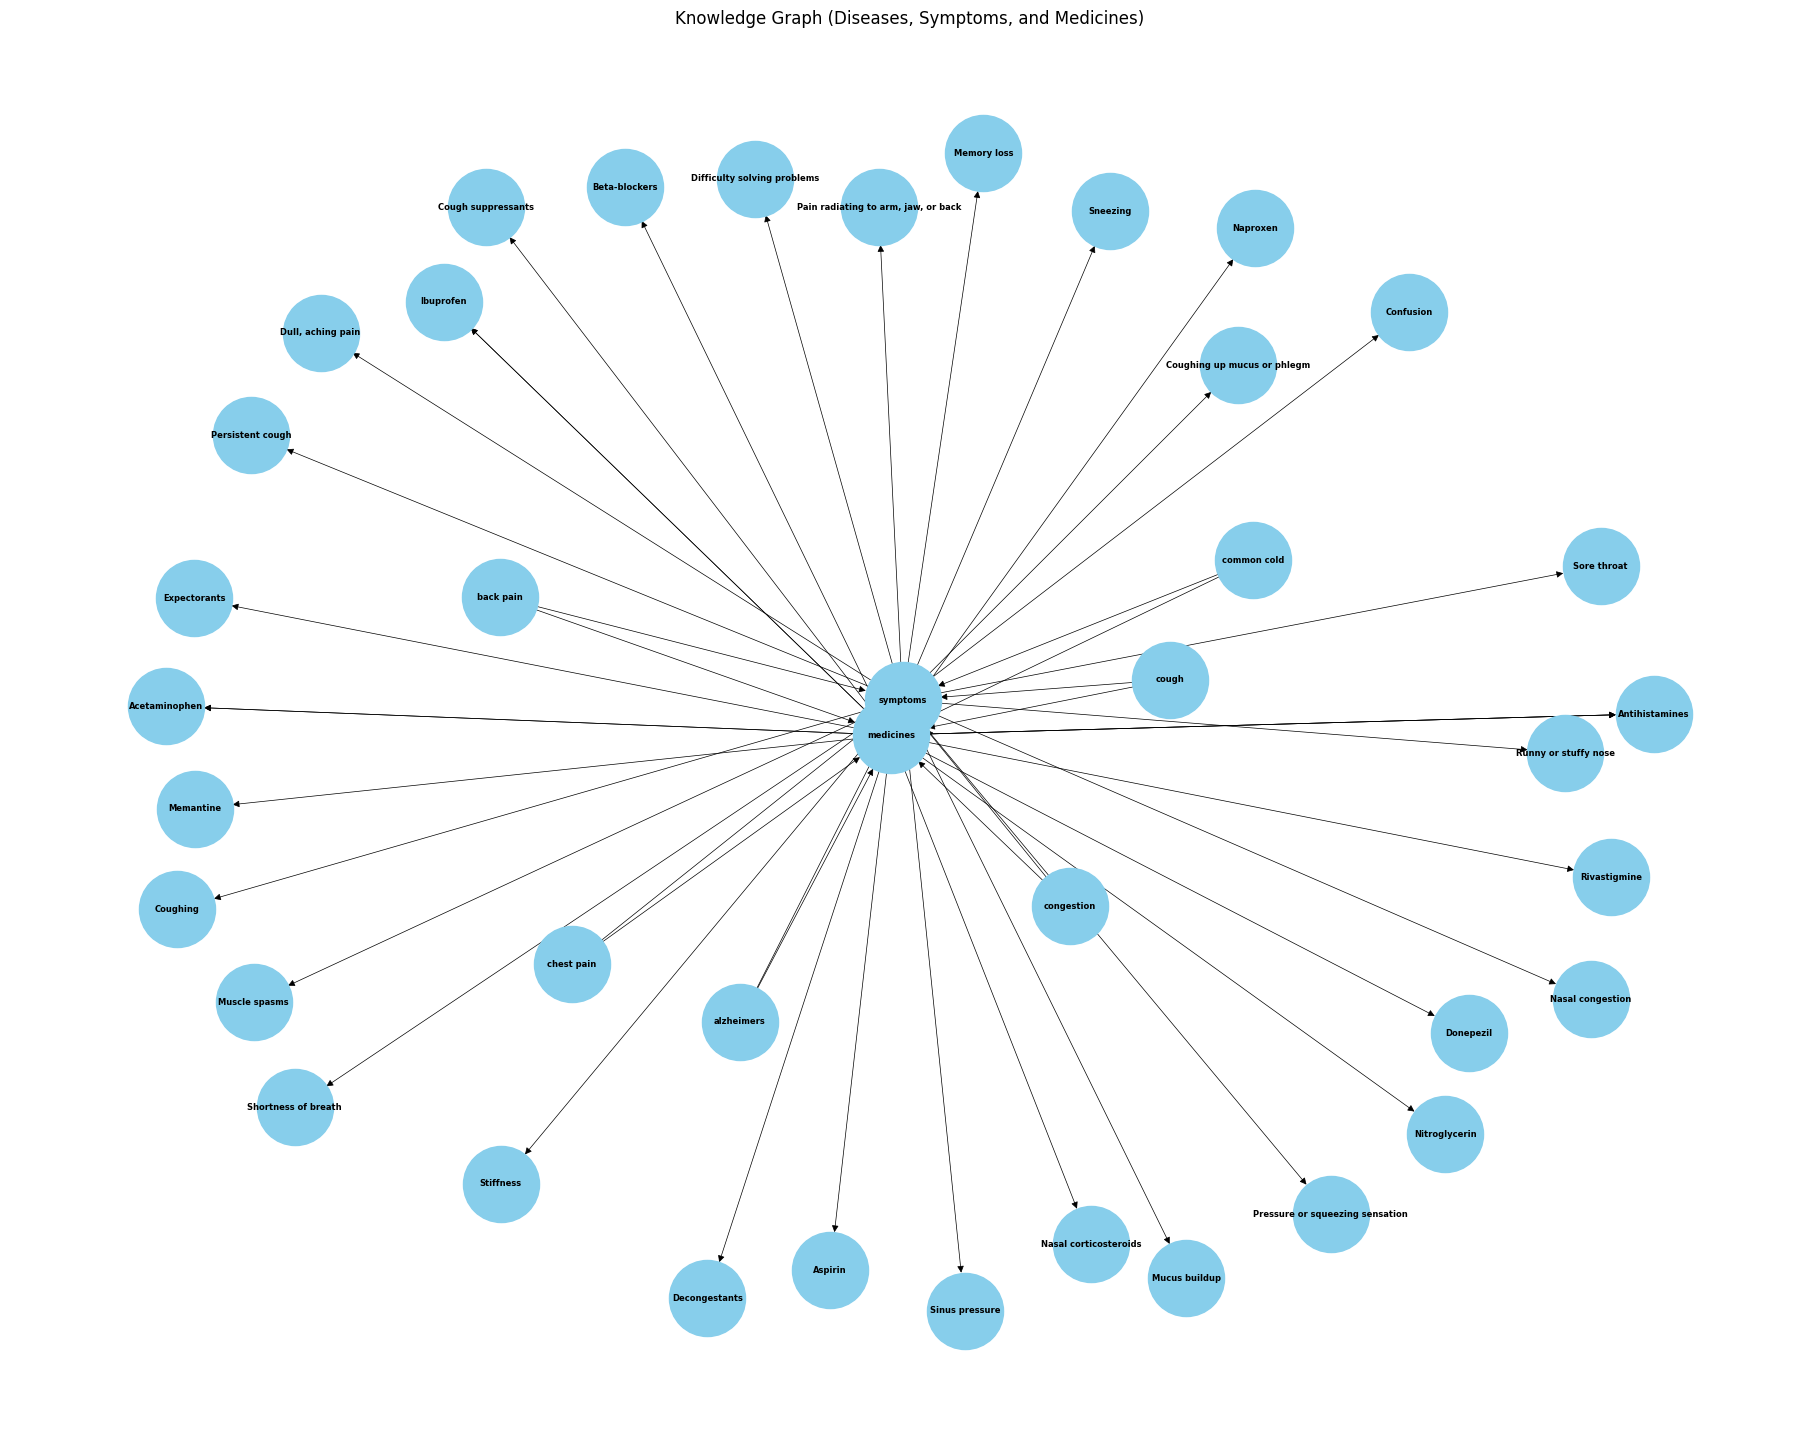

In [ ]:
G = nx.MultiDiGraph()

# Add diseases as main nodes and 'symptoms' and 'medicines' as sub-nodes
for disease in knowledge_graph1:
    G.add_node(disease)
    G.add_node('symptoms')
    G.add_node('medicines')
    G.add_edge(disease, 'symptoms')
    G.add_edge(disease, 'medicines')

    # Add the top 3 symptoms as sub-sub-nodes
    for symptom in knowledge_graph1[disease]['symptoms'][:3]:
        G.add_node(symptom)
        G.add_edge('symptoms', symptom)

    # Add the top 3 medicines as sub-sub-nodes
    for medicine in knowledge_graph1[disease]['medicines'][:3]:
        G.add_node(medicine)
        G.add_edge('medicines', medicine)

# Create a layout for our nodes
layout = nx.spring_layout(G, k=1)

# Draw the graph
plt.figure(figsize=(18, 14))
nx.draw(G, layout, with_labels=True, node_size=3000, node_color='skyblue', font_size=6, font_color='black', font_weight='bold', width=0.5, arrowsize=10)
plt.title("Knowledge Graph (Diseases, Symptoms, and Medicines)")
plt.show()